<a href="https://colab.research.google.com/github/Janardhan-yadav/AIML_Projects_and_labs/blob/main/AIML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [3]:
from google.colab import files
uploaded1 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv
Saving heart.csv to heart.csv


In [4]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
data.shape

(303, 14)

In [6]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [7]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [8]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

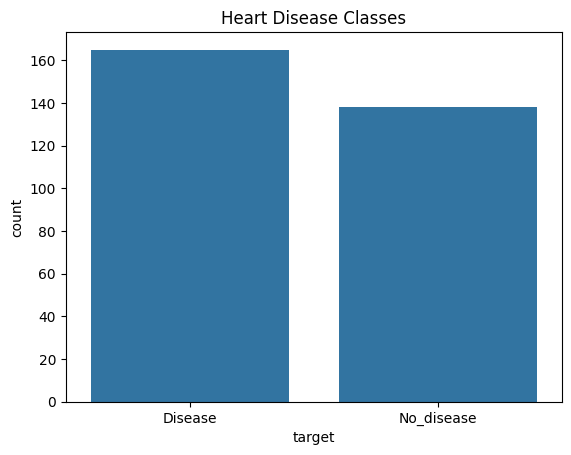

In [9]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

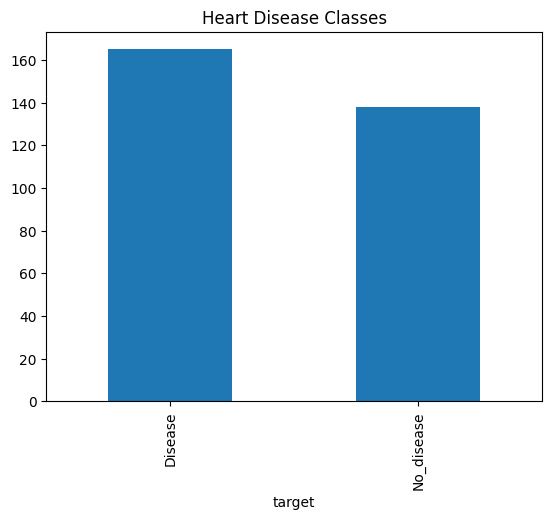

In [10]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

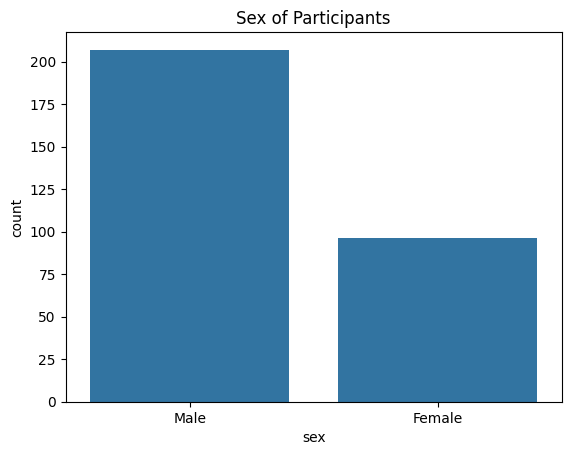

In [11]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
sns.countplot(x='sex', data=data)
plt.title('Sex of Participants')
plt.show()

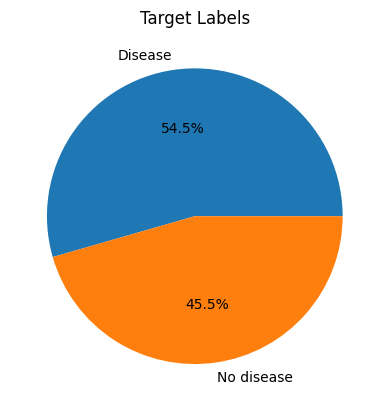

In [12]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

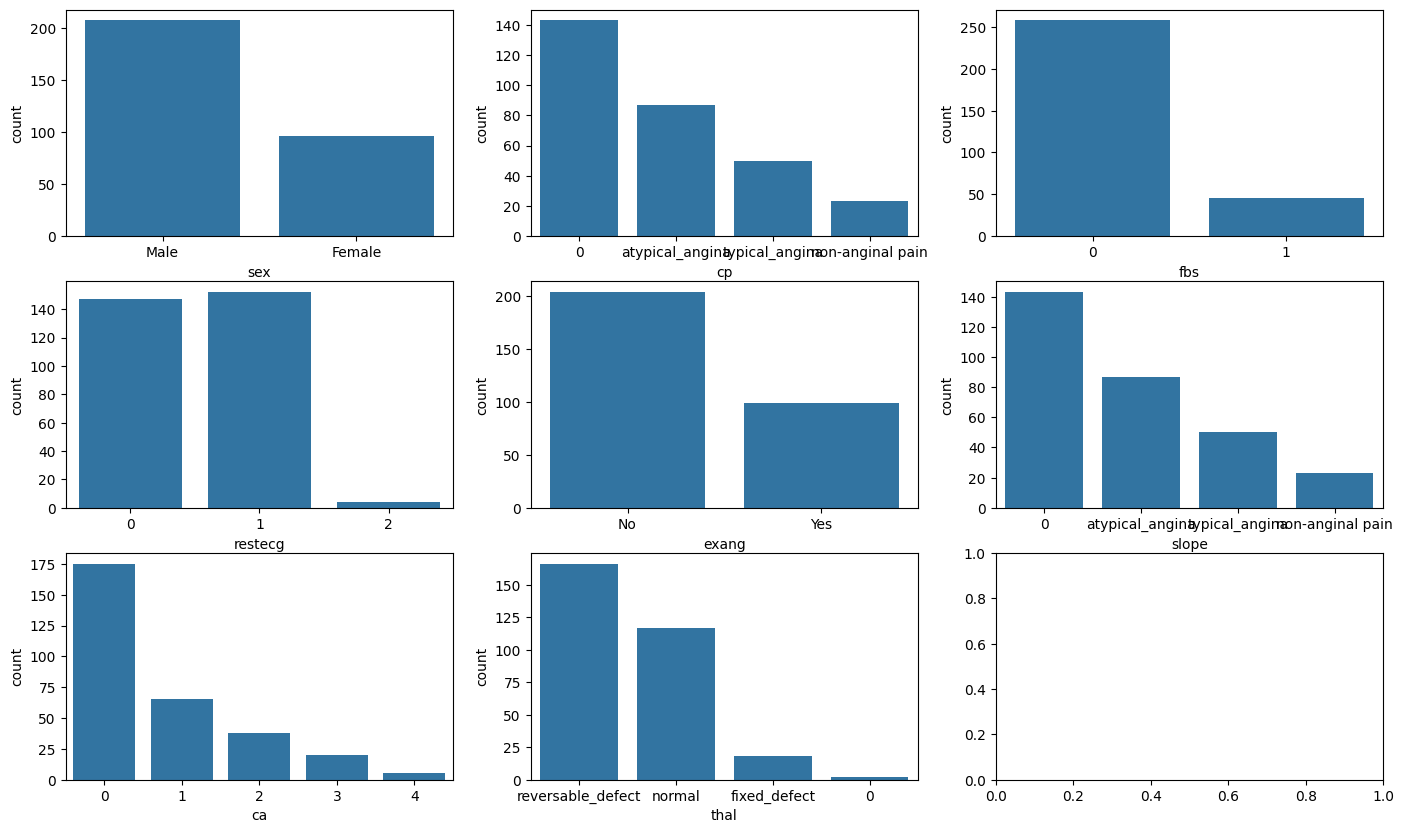

In [13]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

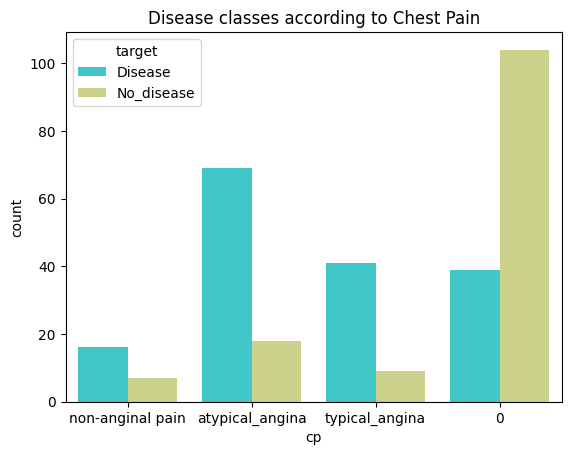

In [14]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

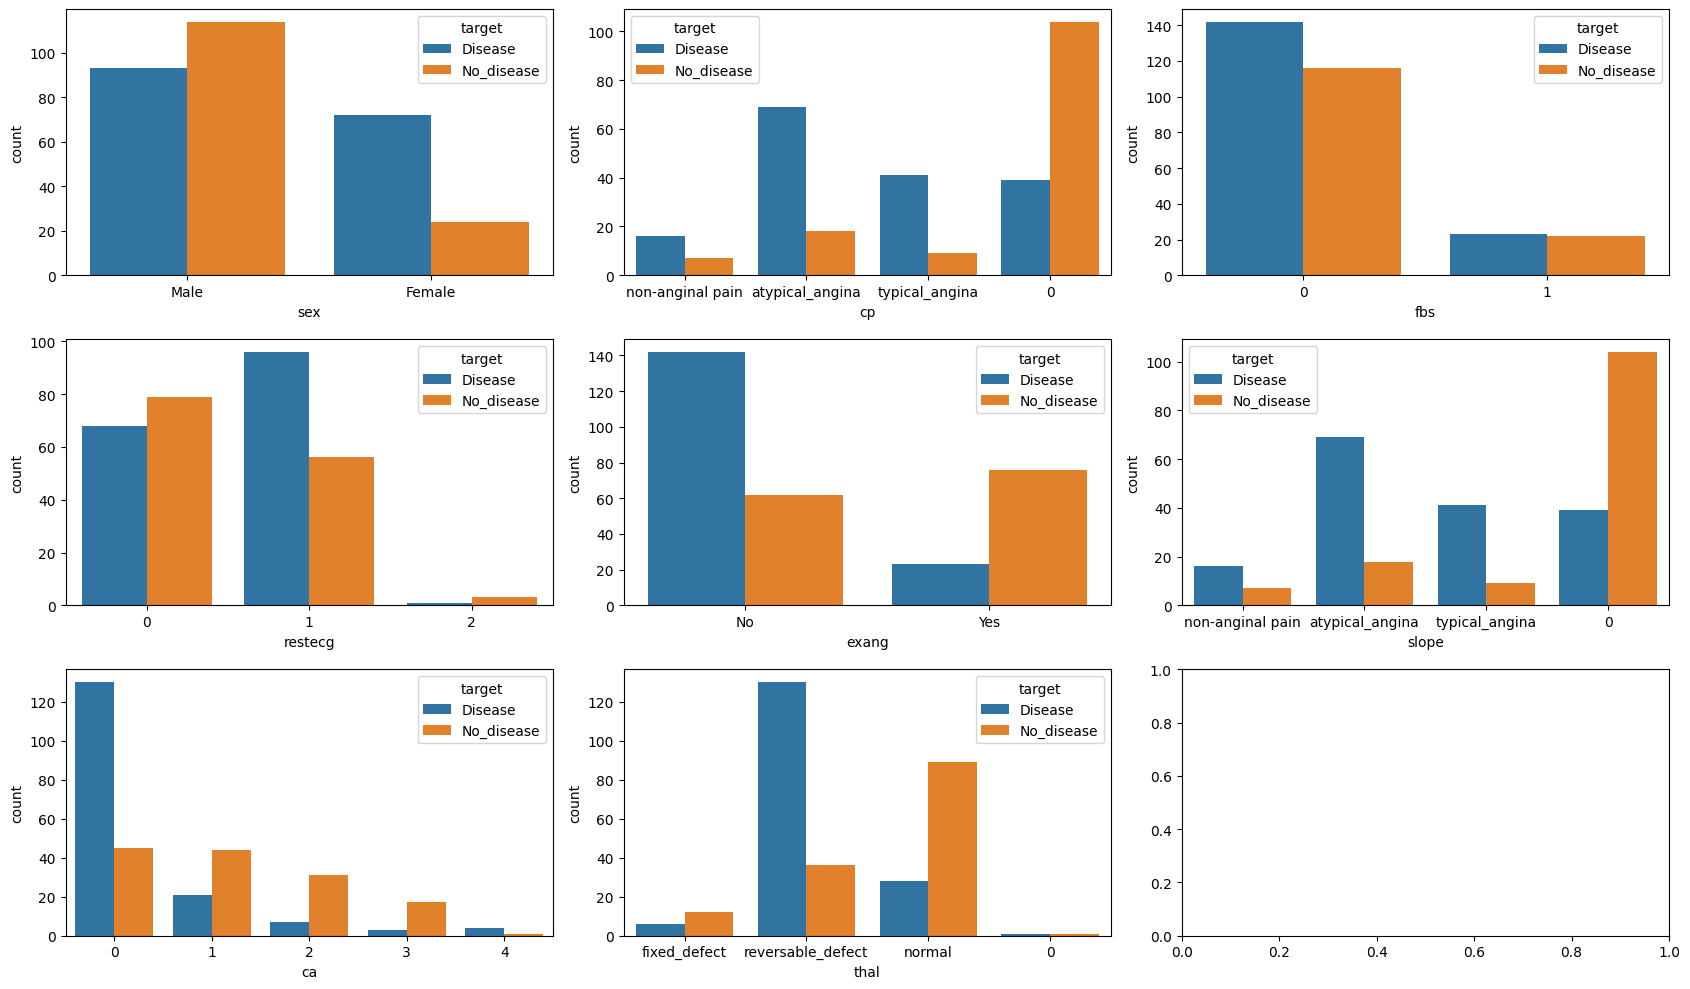

In [15]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do
    sns.countplot(x=feature, hue='target', data=data, ax=ax) # Added this line

plt.tight_layout() # Ensures the plots don't overlap
plt.show()


In [16]:
# Visualising the distribution of the continous variables

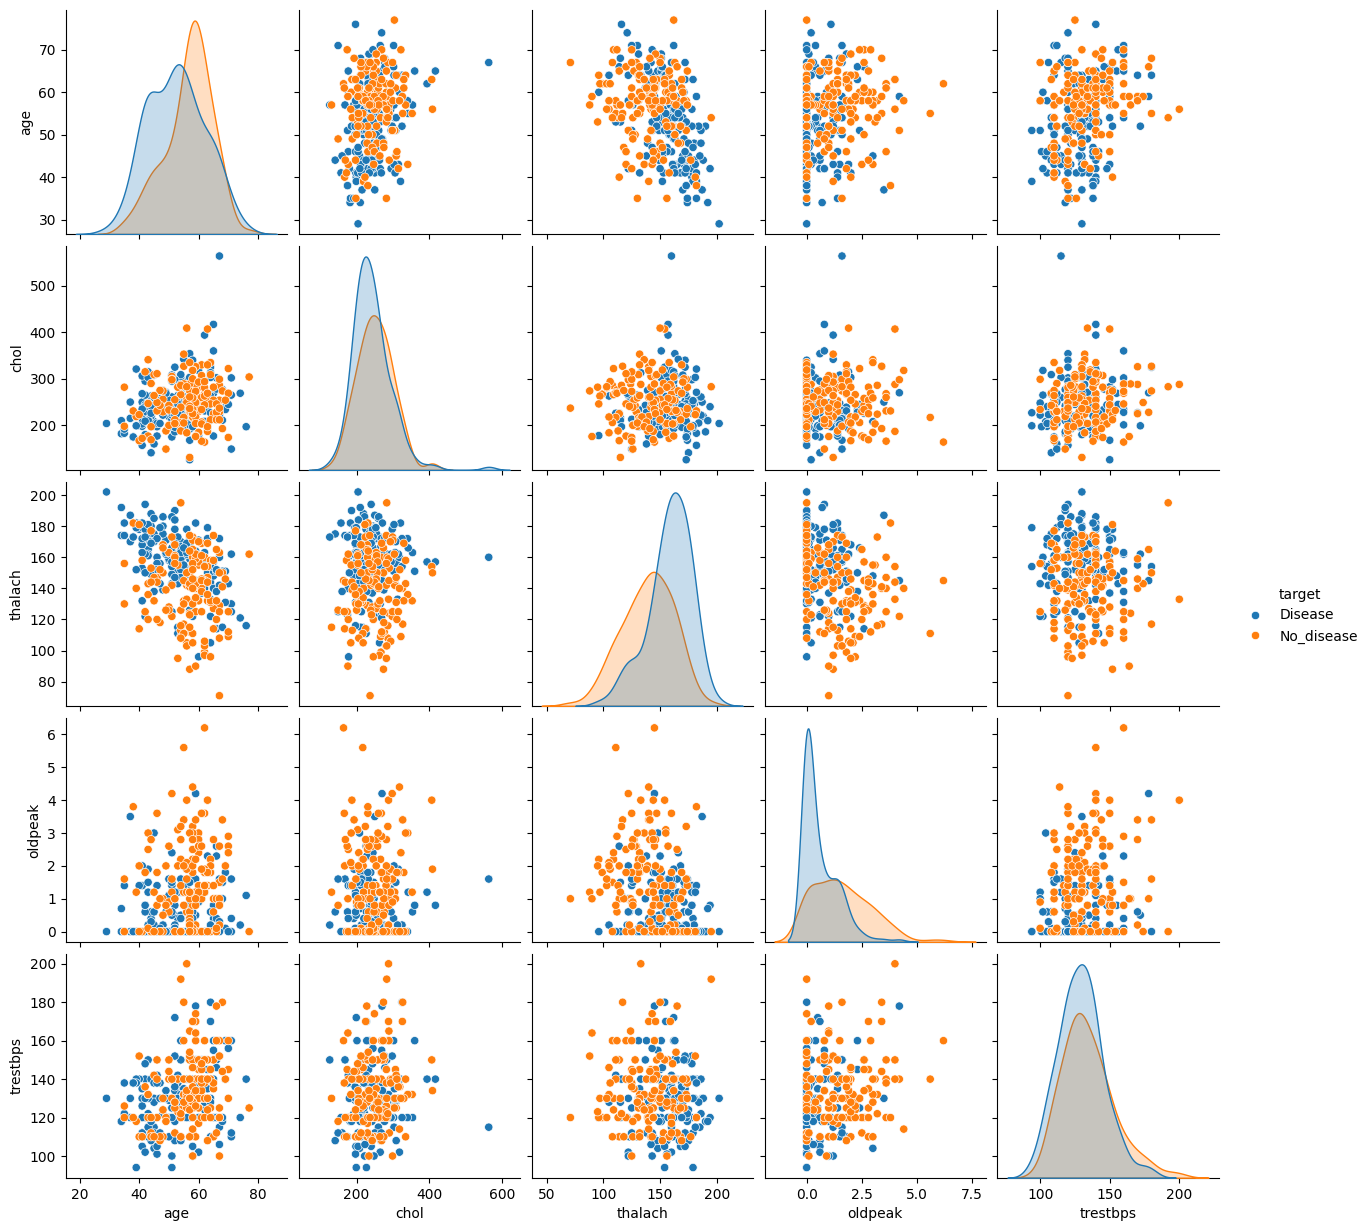

In [17]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

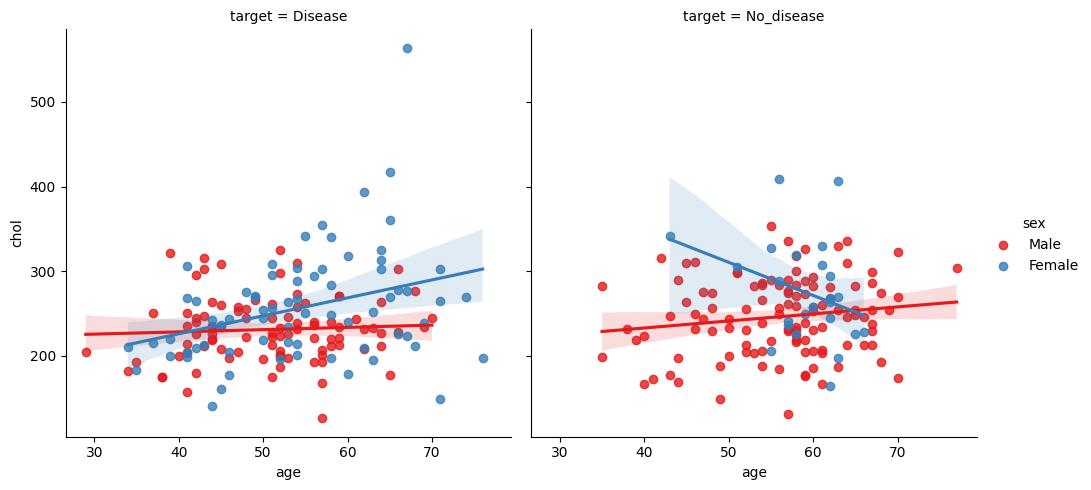

In [18]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

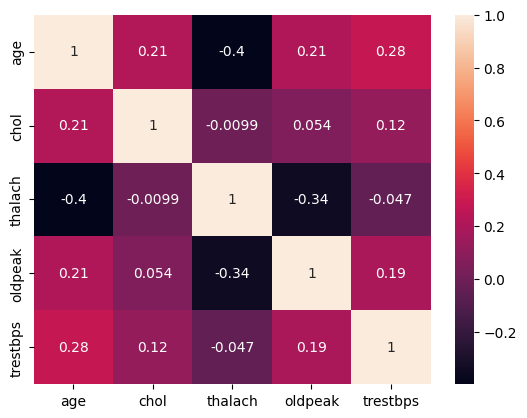

In [19]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

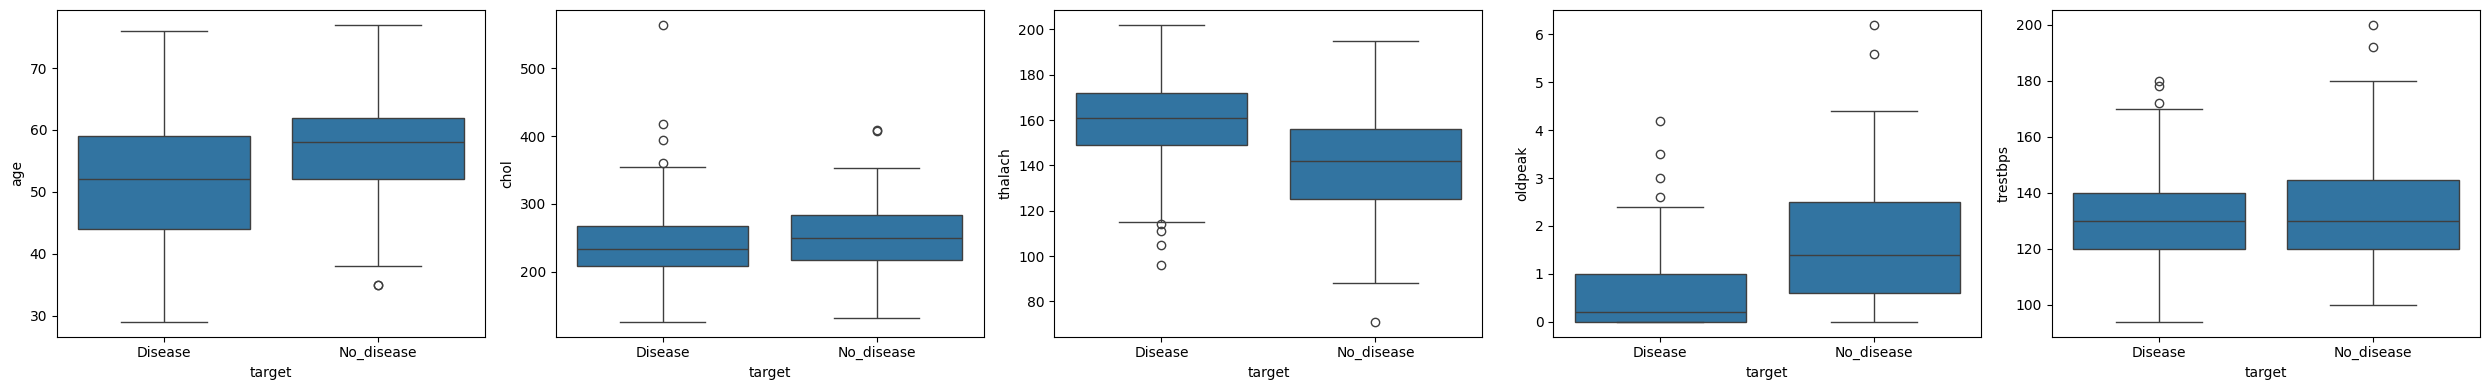

In [20]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

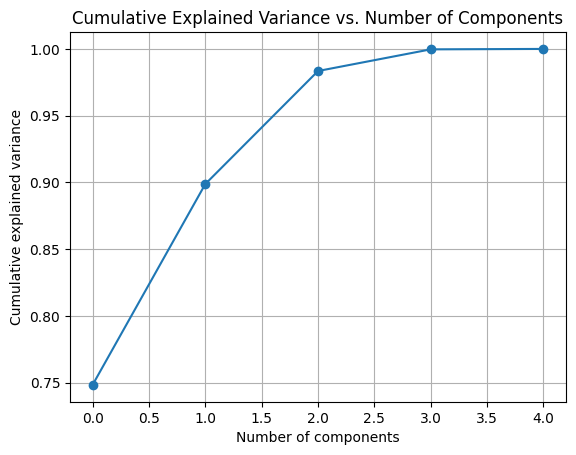

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'numeric_data' contains your continuous features
pca = PCA()
pca.fit(numeric_data)

# Plotting the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs. Number of Components') # Added a title for clarity
plt.grid(True) # Added a grid for better readability
plt.show()

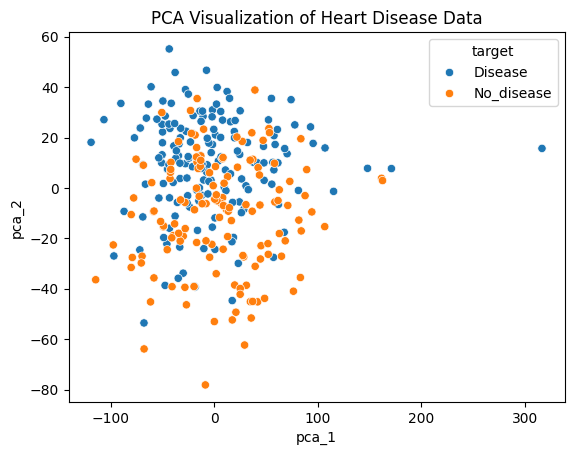

In [22]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


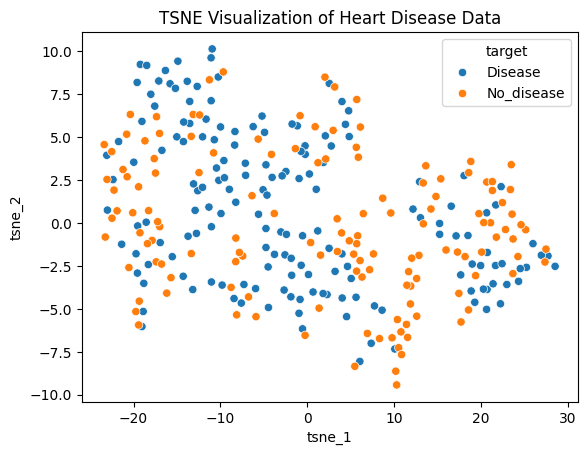

In [23]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

1. What is the percentage of Samples with Disease?

Looking at the bar plot or pie chart you created for the 'target' variable, you can determine the percentage of samples with disease. To rephrase the output, you should run the code to see the percentage, however I can give you guidance on how to do so. You would first get the count of each class, which is present in data['target'].value_counts(), this gives the number of people with and without the disease. Then, you would calculate the percentage.

2. What are the 3 continuous features that show a significant statistical difference in distribution with respect to the presence and absence of the disease?

To identify continuous features with significant differences in distribution between disease and no disease groups, consider the box plots you created for each continuous feature. Look for features where the boxes (interquartile ranges) and medians are clearly separated between the two groups. The code you are looking for is:

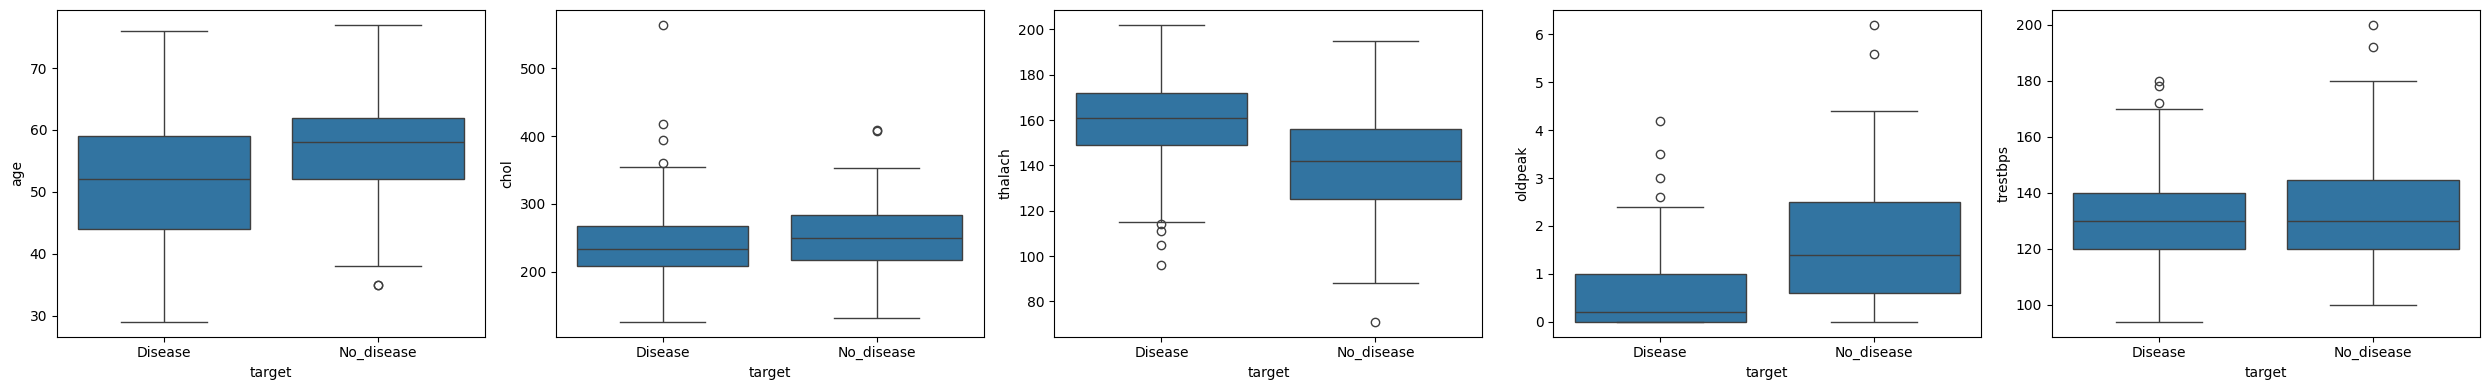

In [24]:
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

3. Can we see a clear separation in terms of the presence/absence of disease in the features obtained from PCA and t-SNE plots?

Examine the scatter plots you generated for PCA and t-SNE. If there is a clear separation between the 'Disease' and 'No_disease' groups in these plots, it indicates that the dimensionality reduction techniques have effectively captured the underlying structure related to the disease.

To rephrase the output, after running the plots, look for clusters or distinct regions in the scatter plots that predominantly contain points belonging to either 'Disease' or 'No_disease'. This separation or clustering represents how well PCA and TSNE could isolate the features to distinguish between the two groups.

4. What is the optimal number of principal components in our case?

Refering to the cumulative variance plot of PCA. The optimal number of principal components is often chosen based on the 'elbow point' of the curve. The code is:

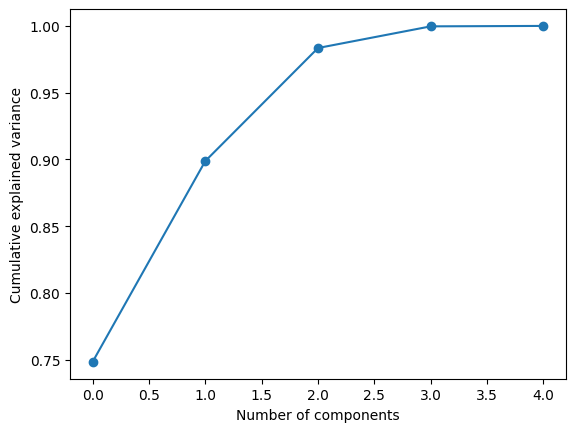

In [25]:
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [26]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [27]:
data = pd.read_csv("star_nutri_expanded.csv")

In [28]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [29]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [30]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [31]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [33]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [34]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [35]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [36]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [37]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [38]:

data = data.replace({True: 1, False: 0})


<ipython-input-38-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [39]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-39-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [40]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

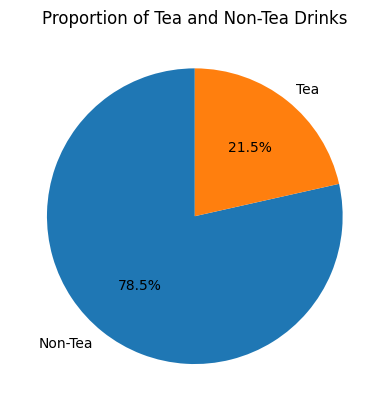

In [42]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Tea' is the column of interest
tea_counts = data['Tea'].value_counts()
labels = ['Non-Tea', 'Tea']  # Labels for the pie chart slices

plt.pie(tea_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Tea and Non-Tea Drinks')
plt.show()


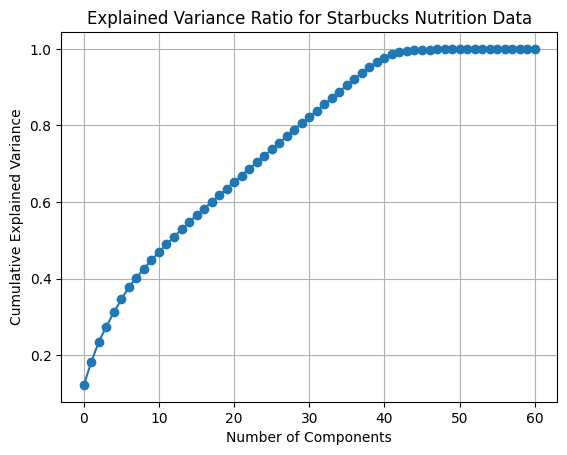

In [44]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the Starbucks nutrition data
# Select numeric features for PCA
numeric_features = data.select_dtypes(include=['number']).drop(columns=['Tea'])  # Exclude 'Tea' as it's the target

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio for Starbucks Nutrition Data')
plt.grid(True)
plt.show()

# Determine the optimal number of components (elbow method)
# ... (Visual inspection of the plot) ...

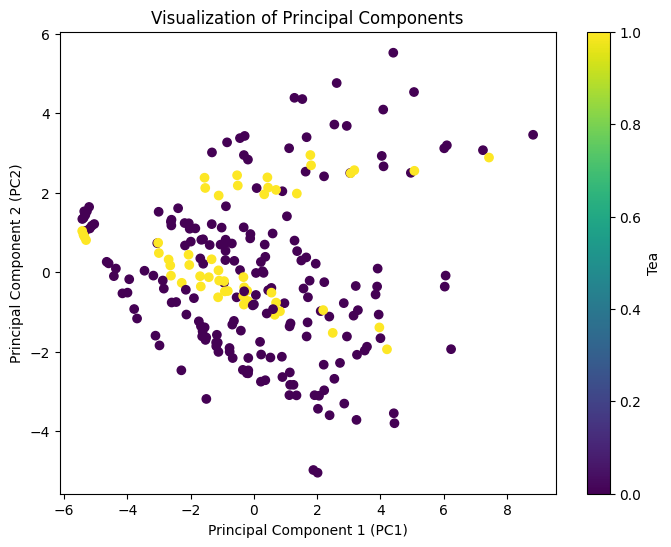

In [45]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and you've determined the optimal number of components (e.g., 5)
optimal_num_components = 5  # Replace with the optimal number you found

# Select numeric features and standardize
numeric_features = data.select_dtypes(include=['number']).drop(columns=['Tea'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Perform PCA with the optimal number of components
pca = PCA(n_components=optimal_num_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components and target variable
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(optimal_num_components)])
pca_df['Tea'] = data['Tea']  # Add the 'Tea' column for visualization

# Visualize the principal components using a scatter plot (e.g., for PC1 vs. PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Tea'], cmap='viridis')  # Color by 'Tea'
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Visualization of Principal Components')
plt.colorbar(label='Tea')  # Add a colorbar to show the mapping of colors to 'Tea' values
plt.show()

# You can create similar scatter plots for other combinations of principal components
# ...

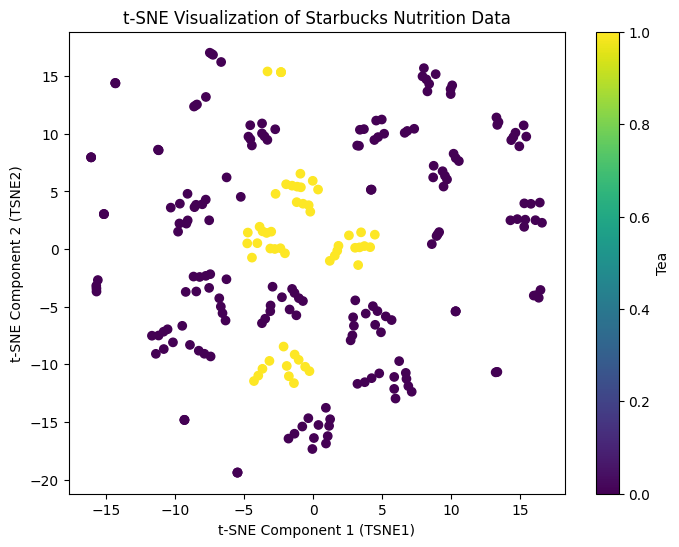

In [46]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Select numeric features and standardize
numeric_features = data.select_dtypes(include=['number']).drop(columns=['Tea'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Set random_state for reproducibility
tsne_data = tsne.fit_transform(scaled_data)

# Create a DataFrame with the t-SNE components and target variable
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Tea'] = data['Tea']  # Add the 'Tea' column for visualization

# Visualize the t-SNE components using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Tea'], cmap='viridis')  # Color by 'Tea'
plt.xlabel('t-SNE Component 1 (TSNE1)')
plt.ylabel('t-SNE Component 2 (TSNE2)')
plt.title('t-SNE Visualization of Starbucks Nutrition Data')
plt.colorbar(label='Tea')  # Add a colorbar to show the mapping of colors to 'Tea' values
plt.show()

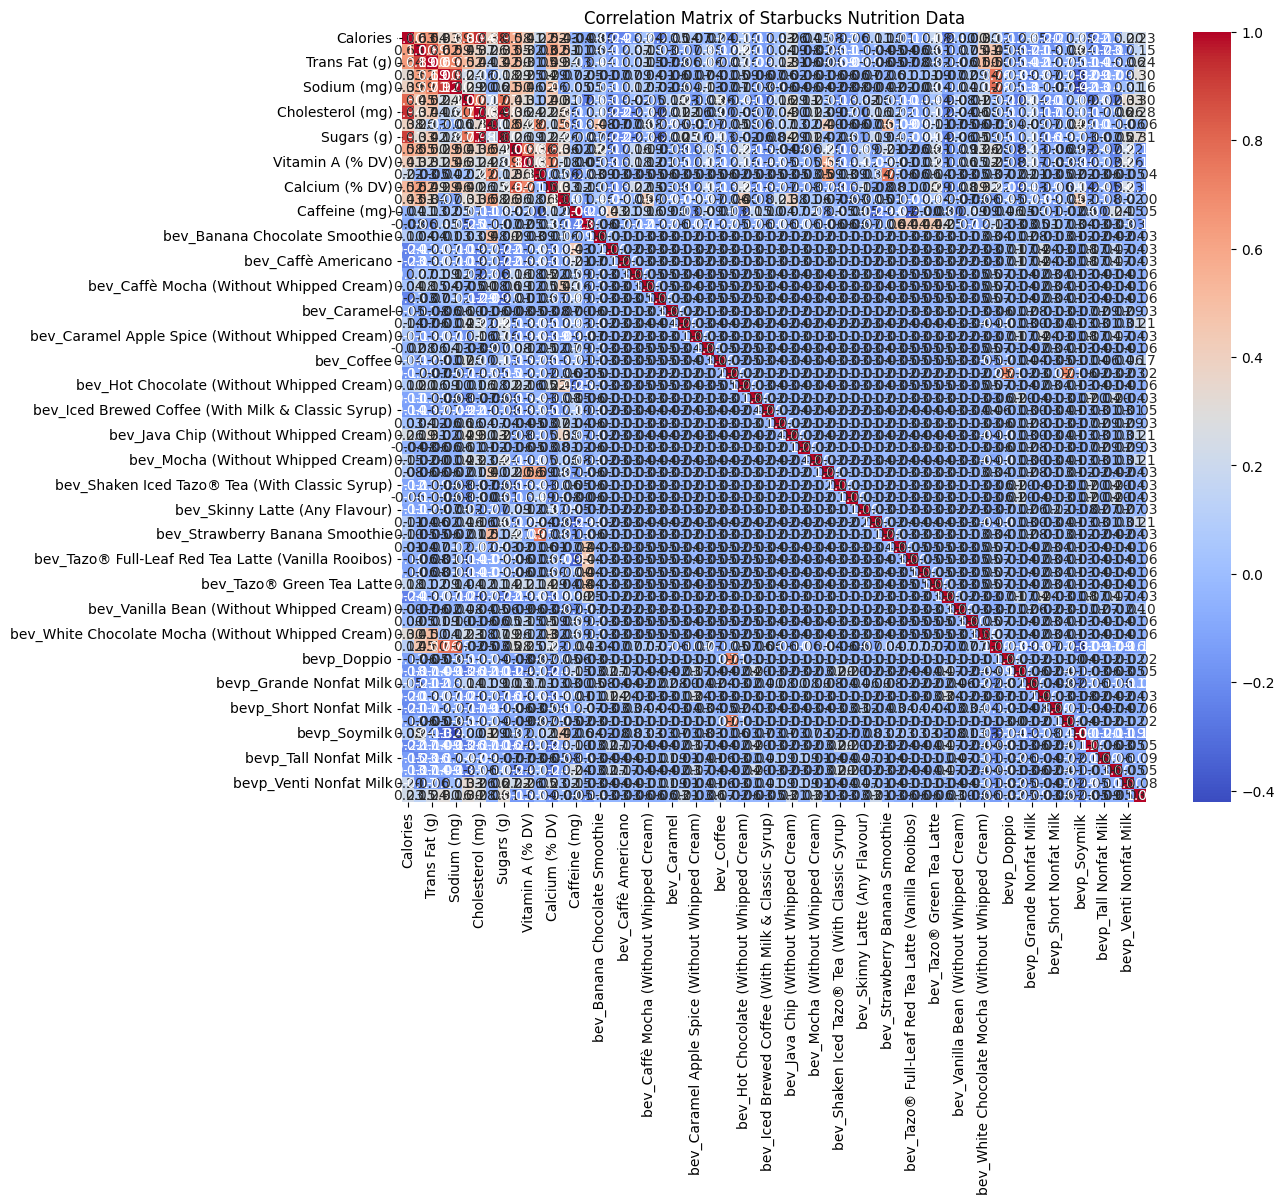

In [47]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select numeric features for correlation analysis
numeric_features = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Starbucks Nutrition Data')
plt.show()

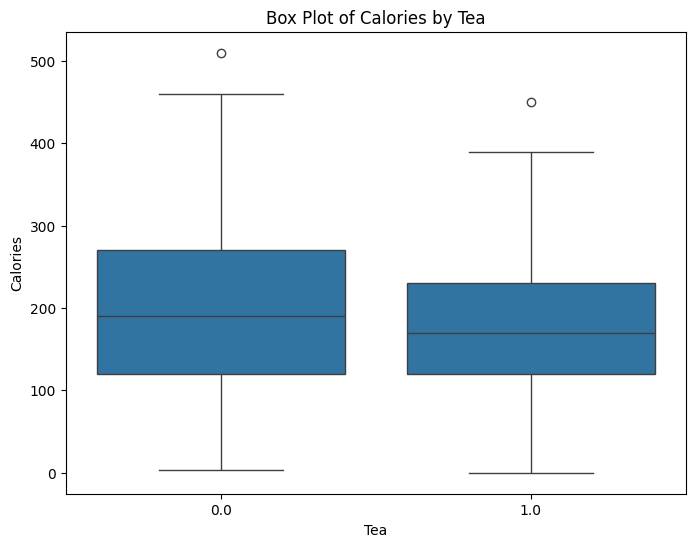

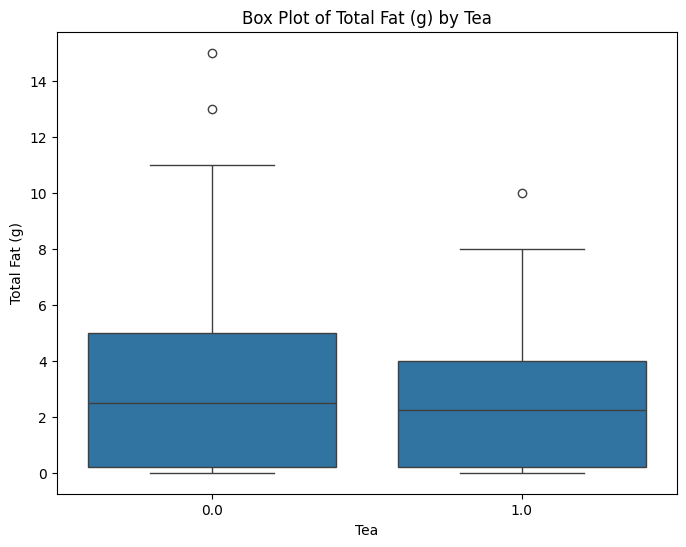

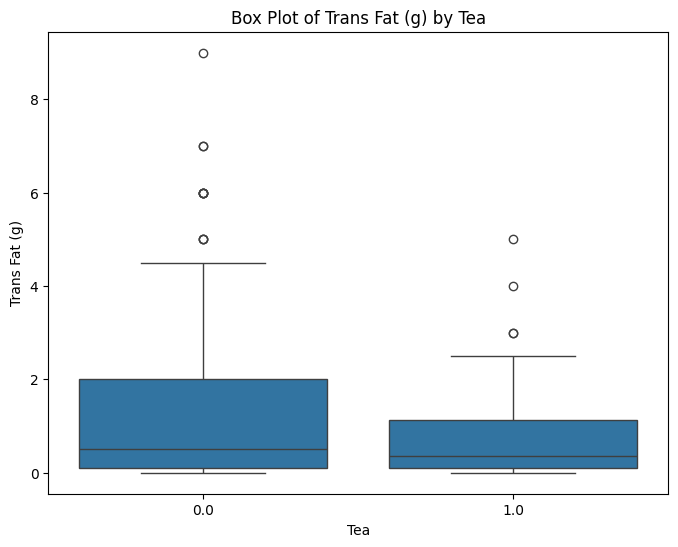

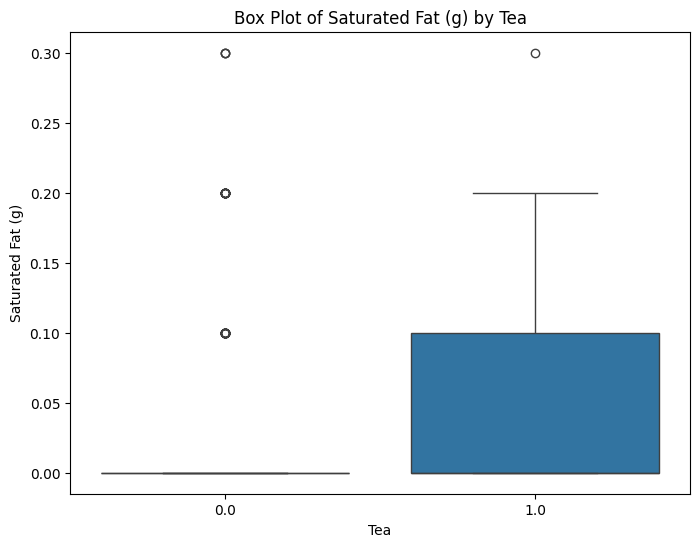

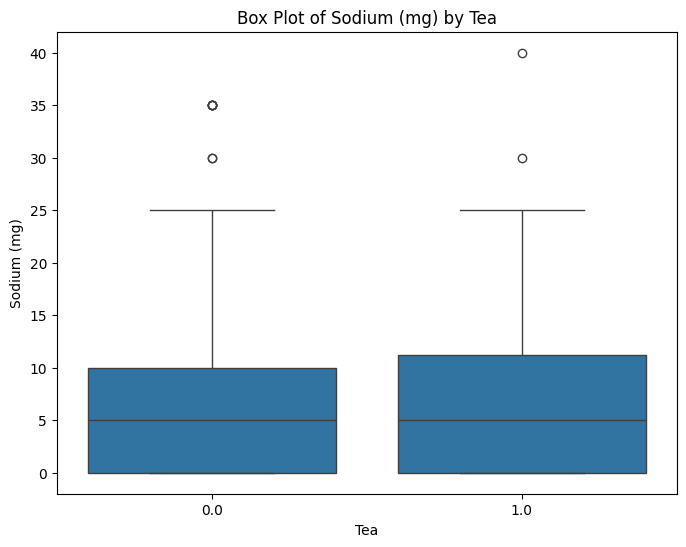

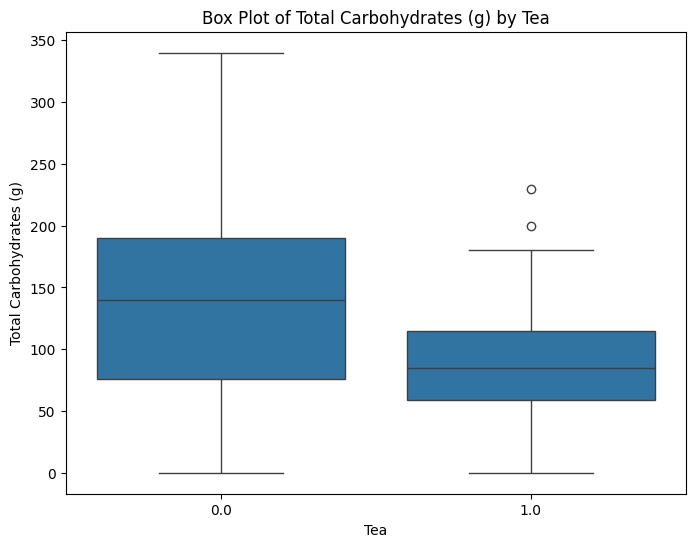

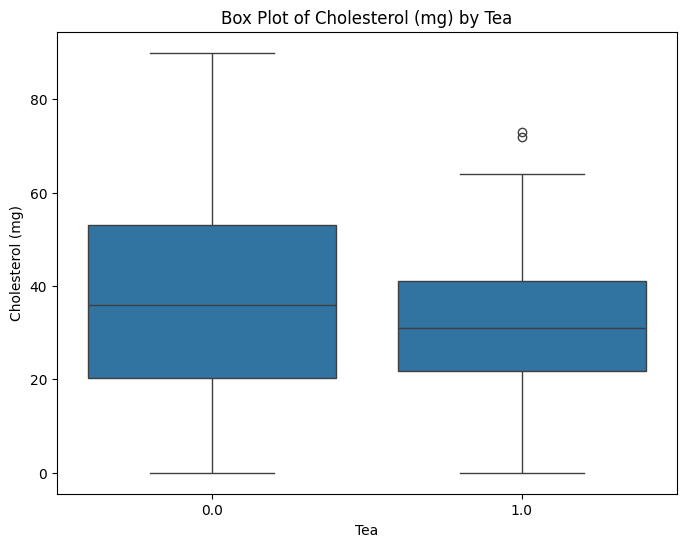

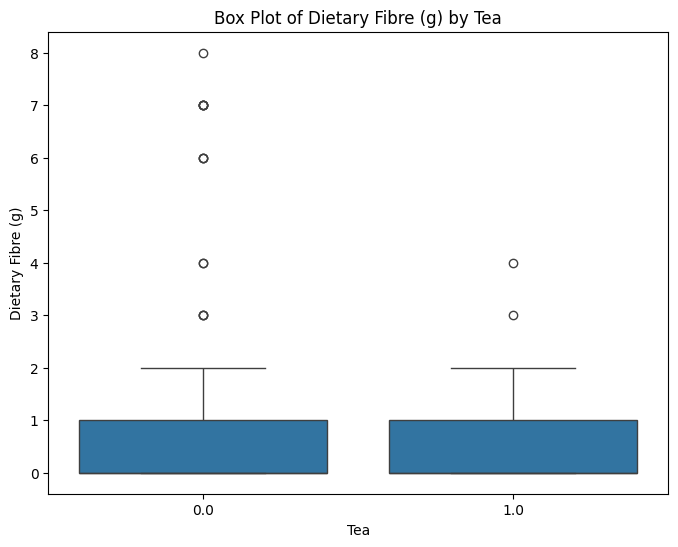

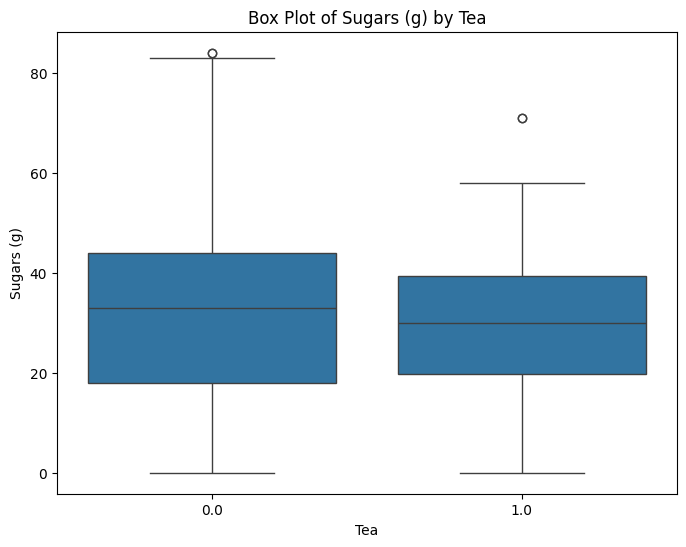

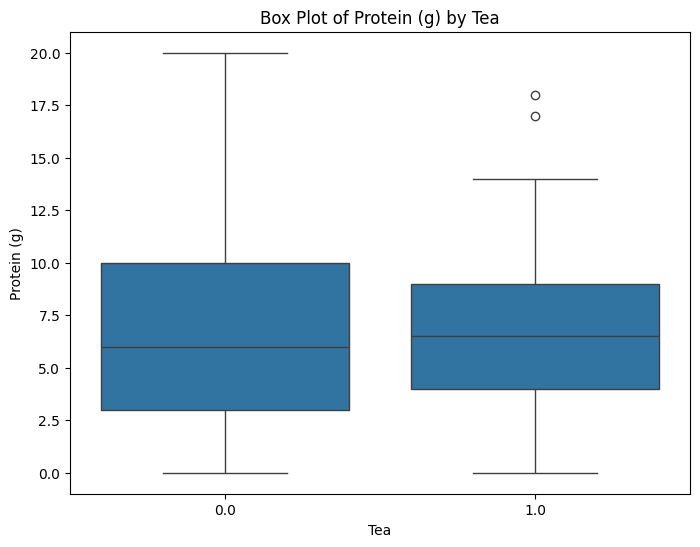

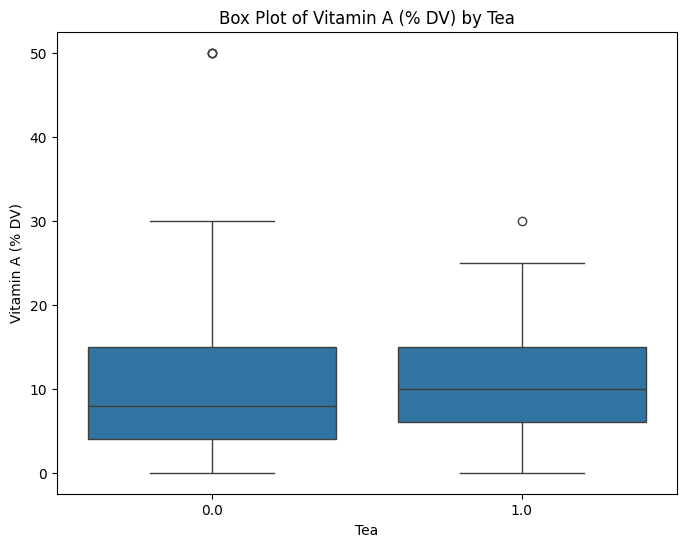

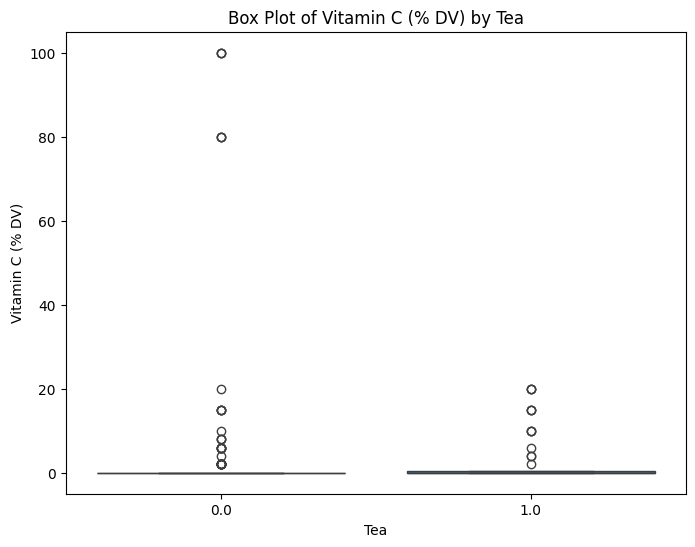

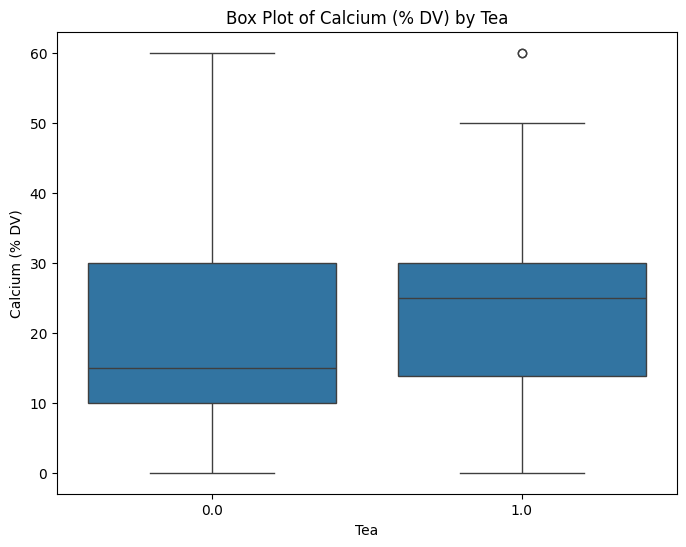

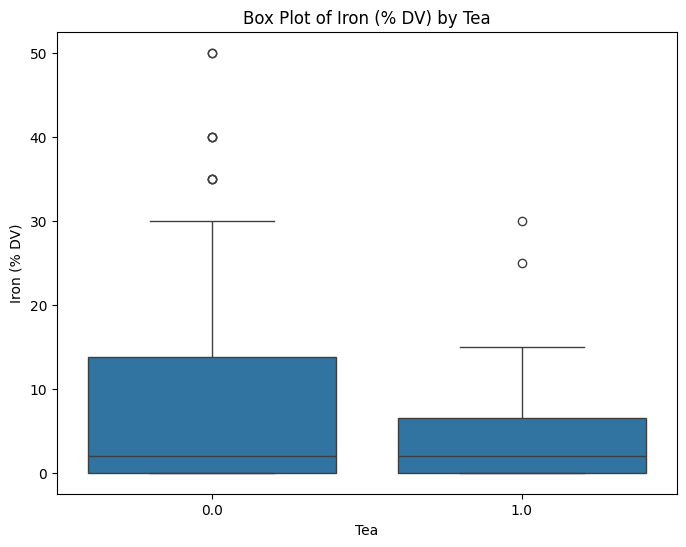

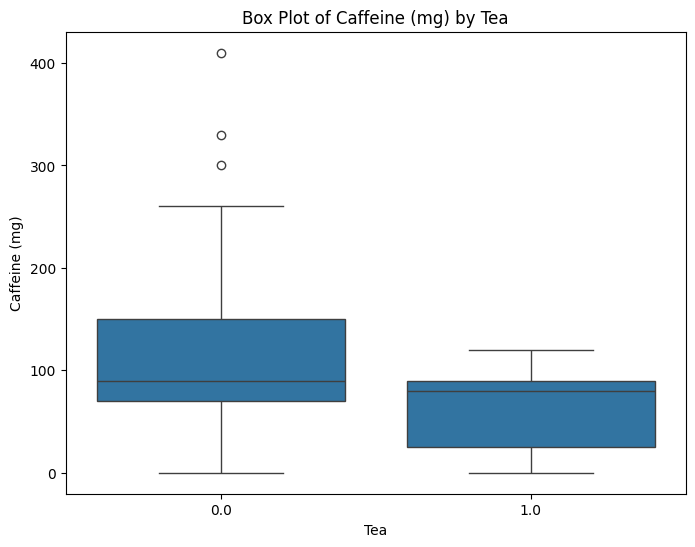

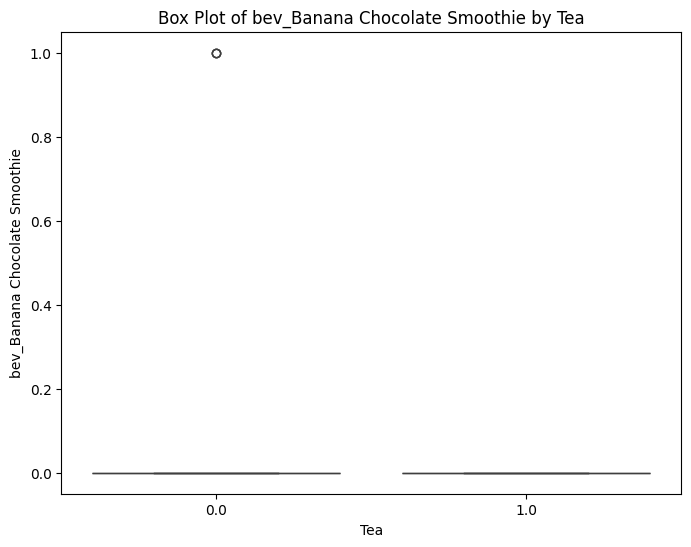

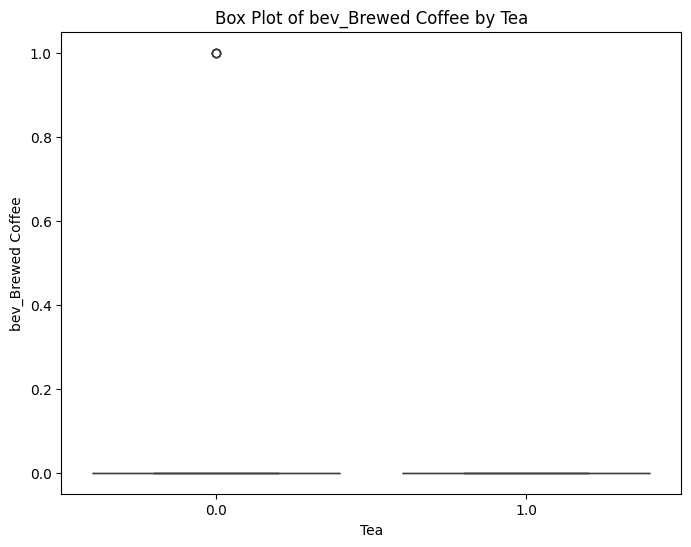

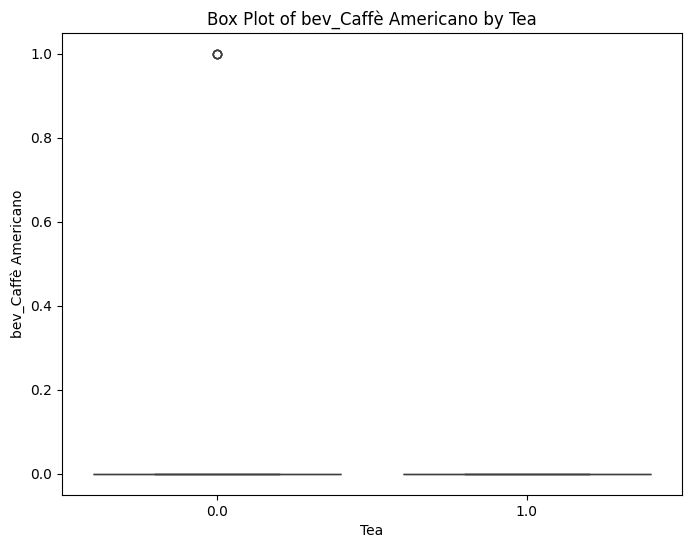

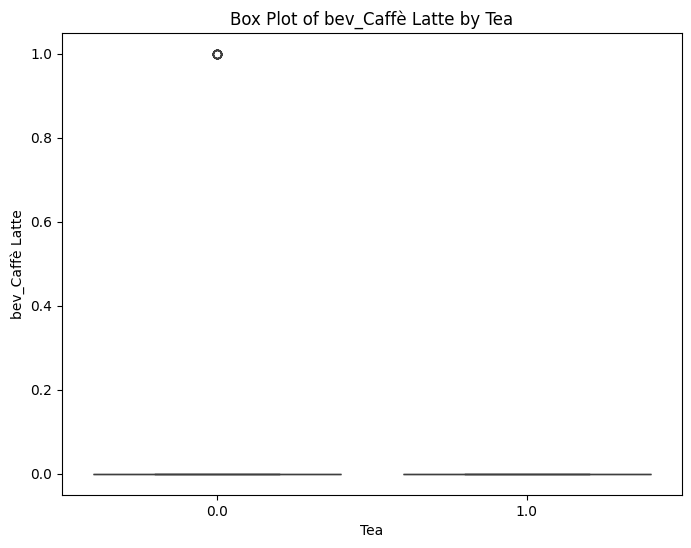

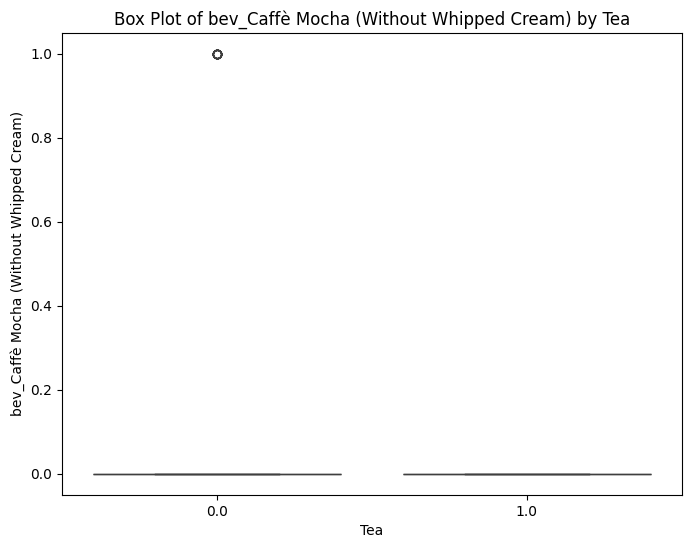

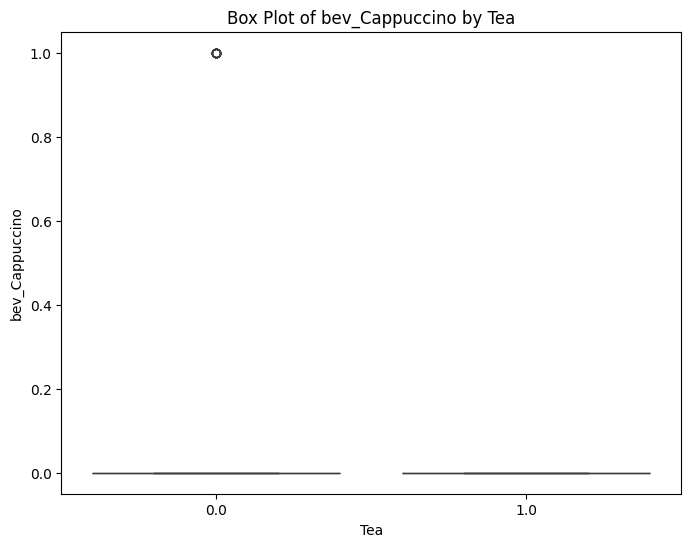

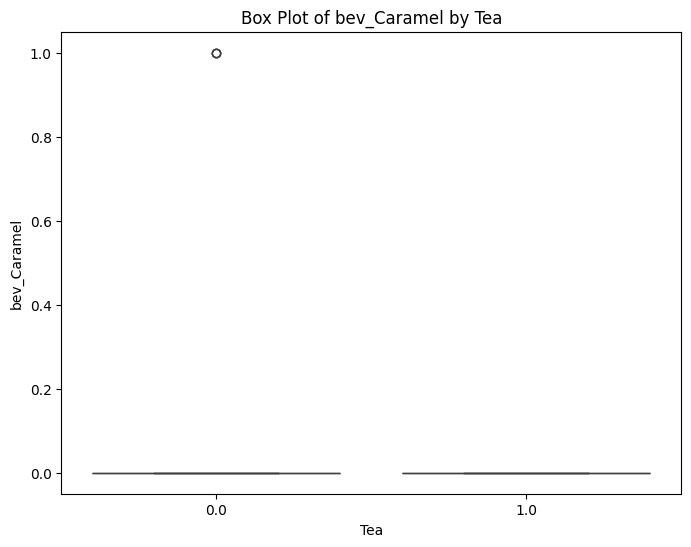

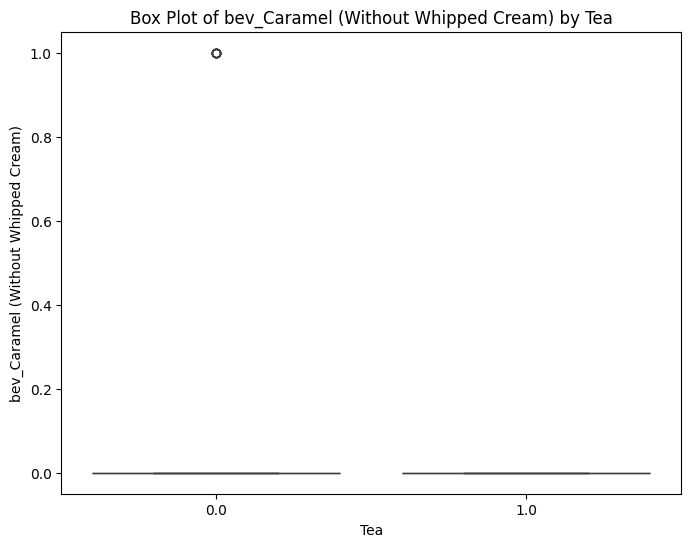

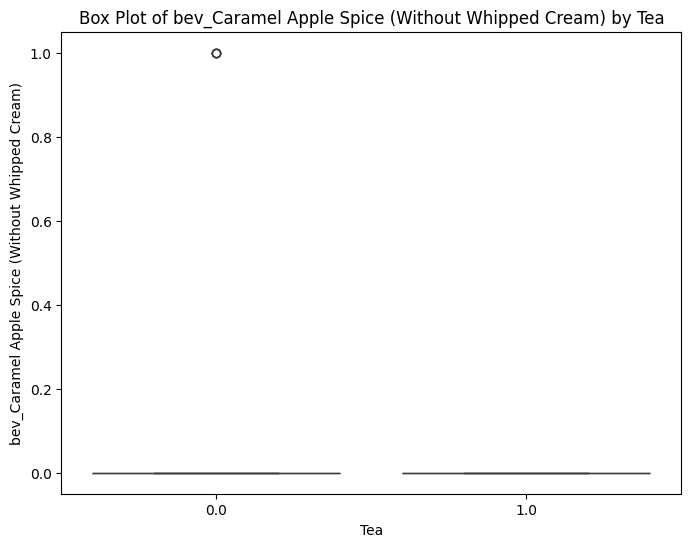

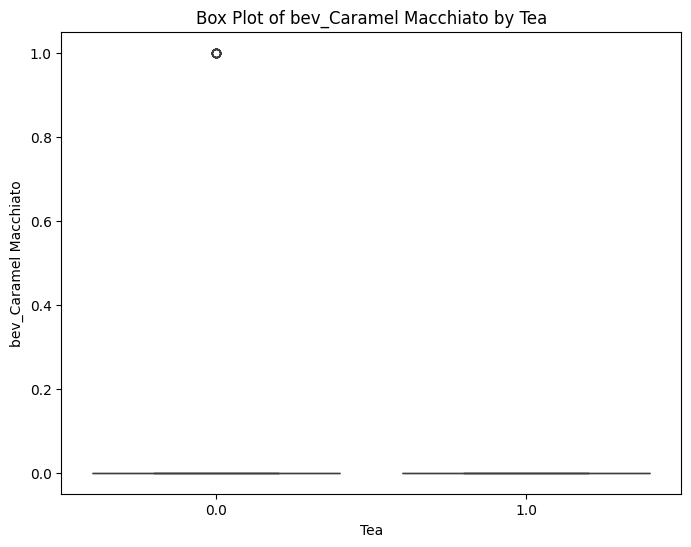

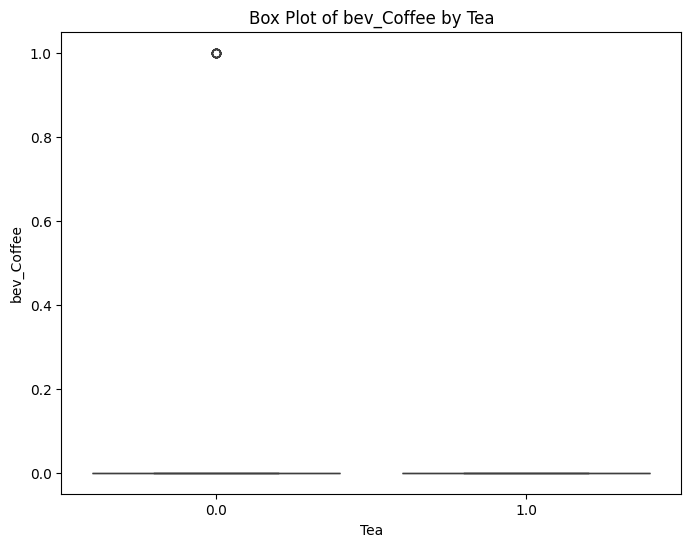

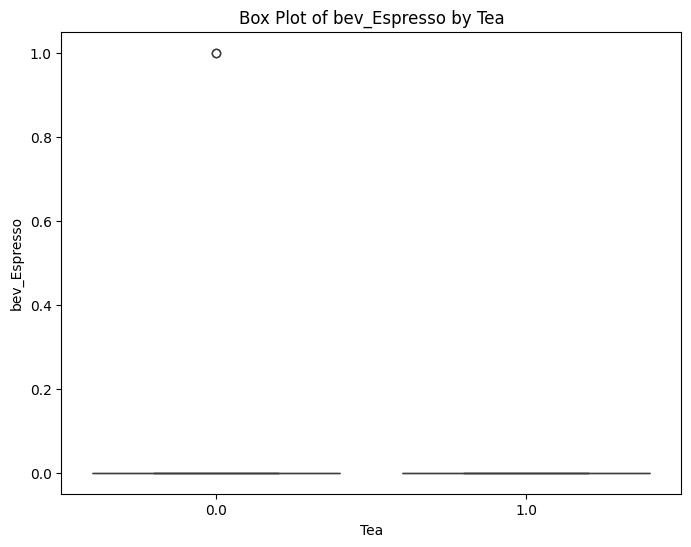

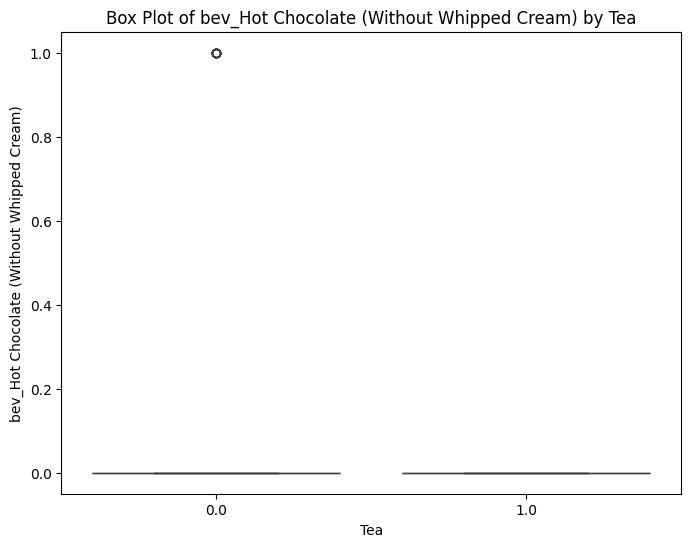

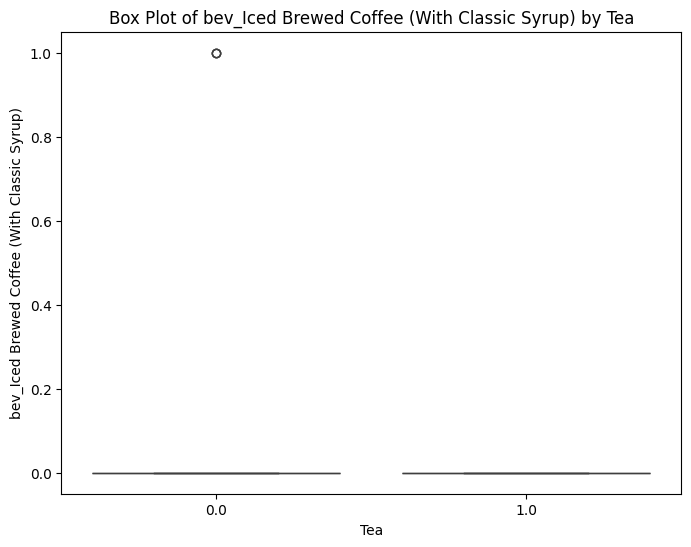

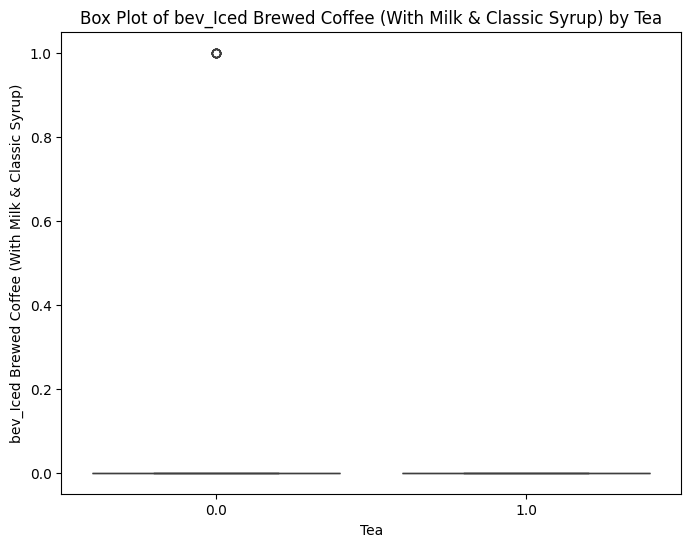

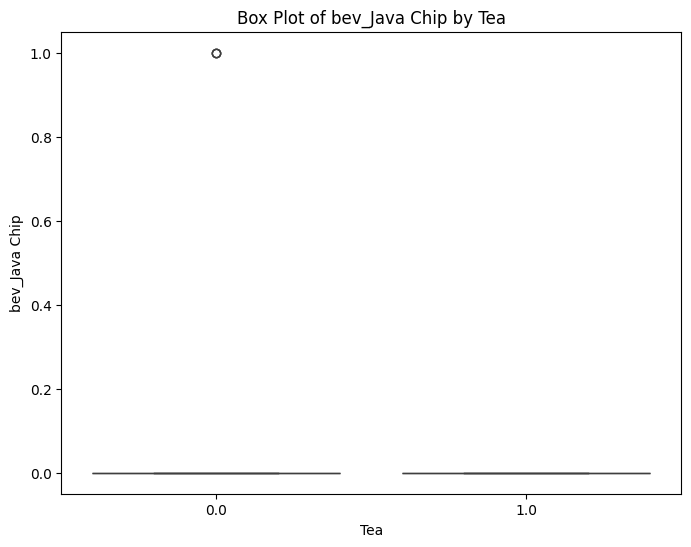

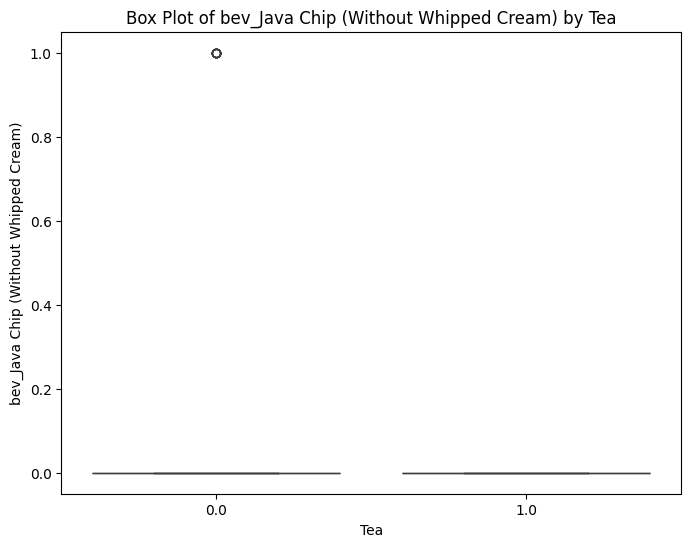

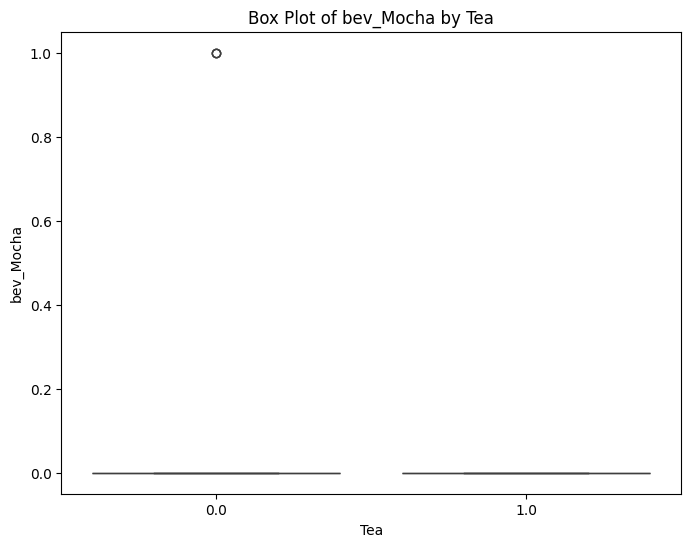

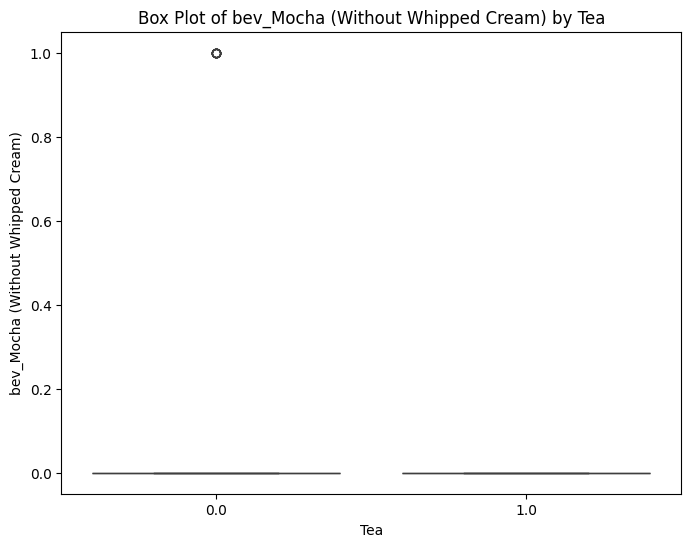

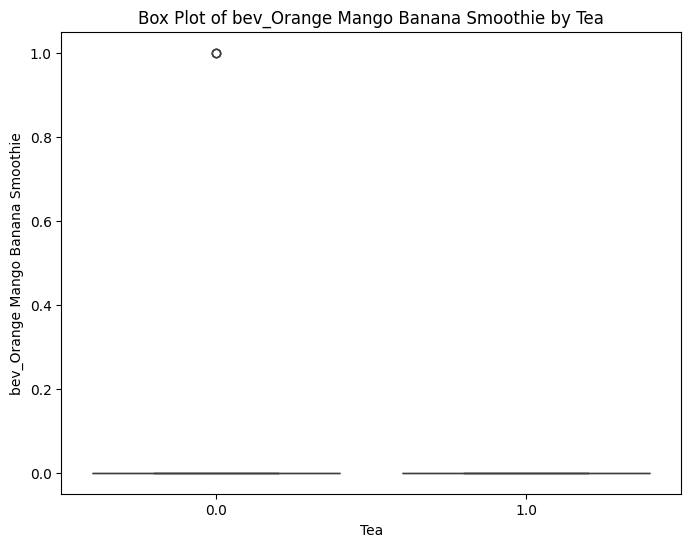

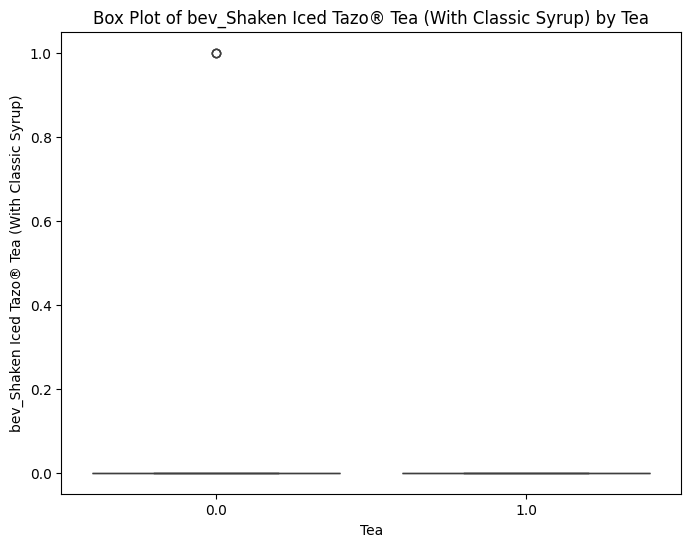

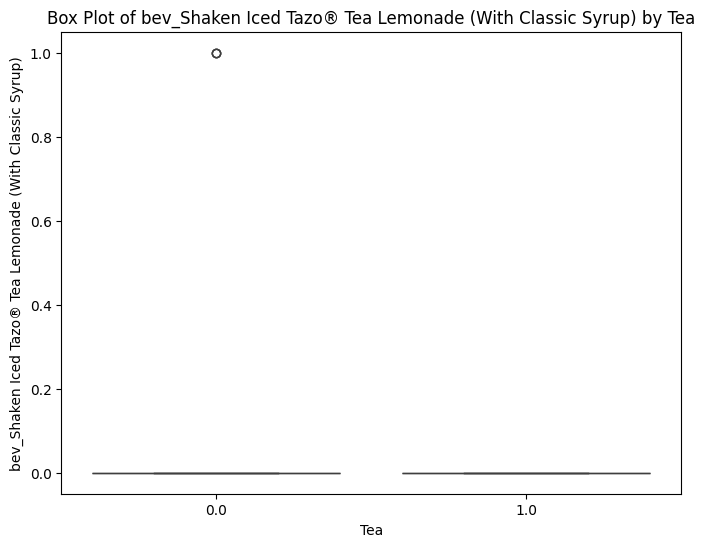

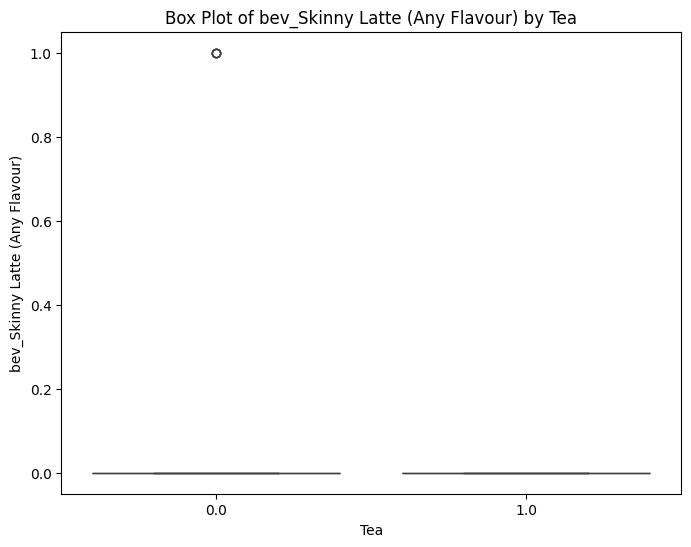

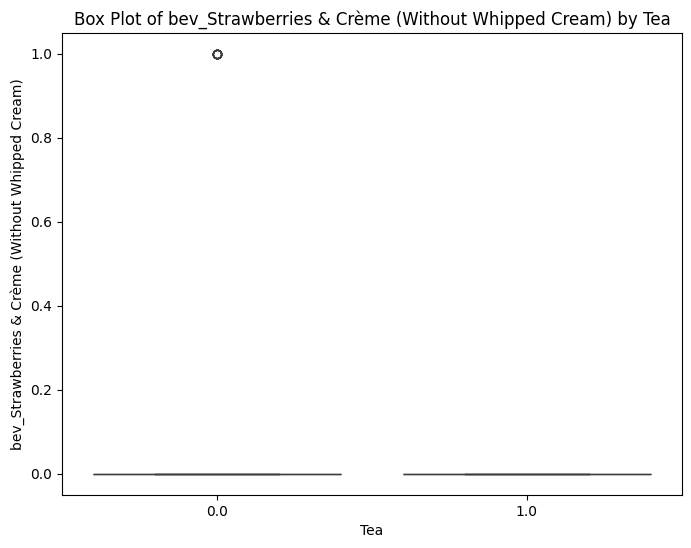

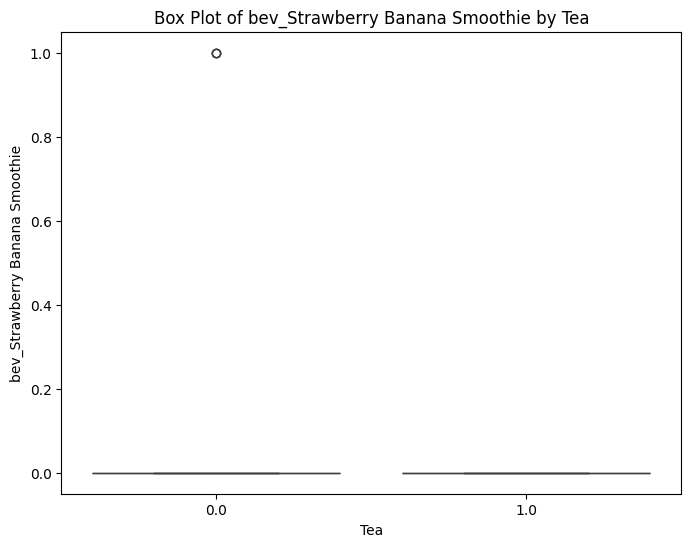

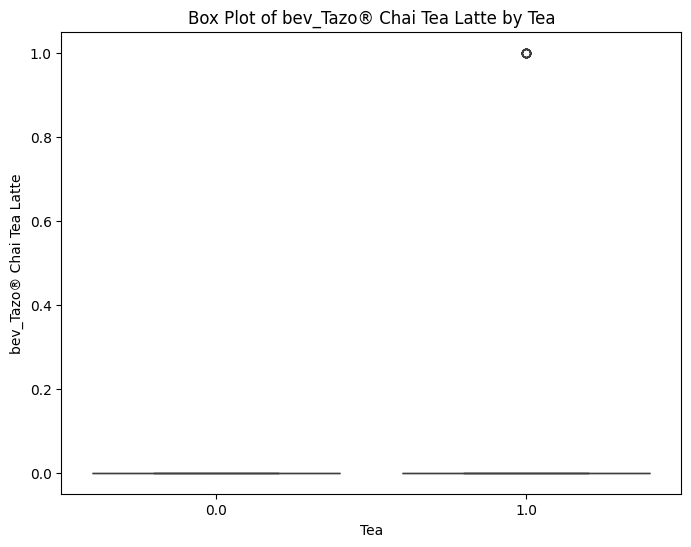

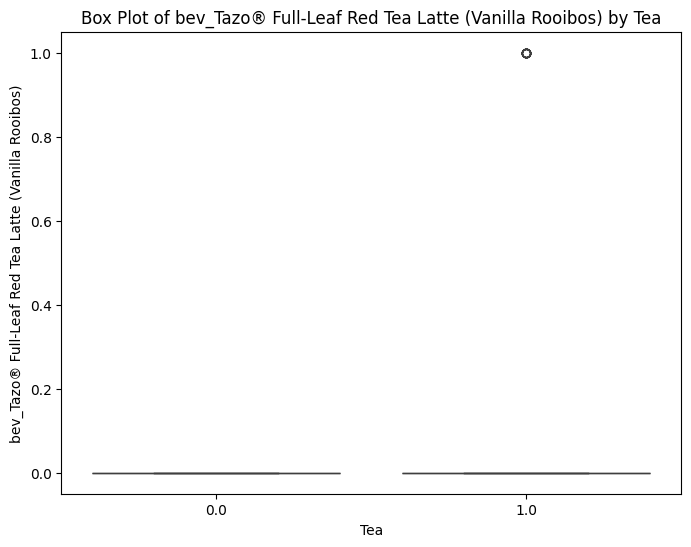

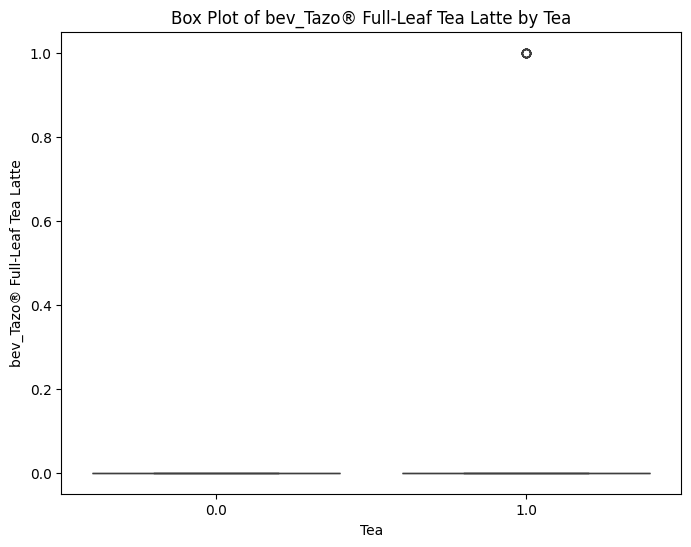

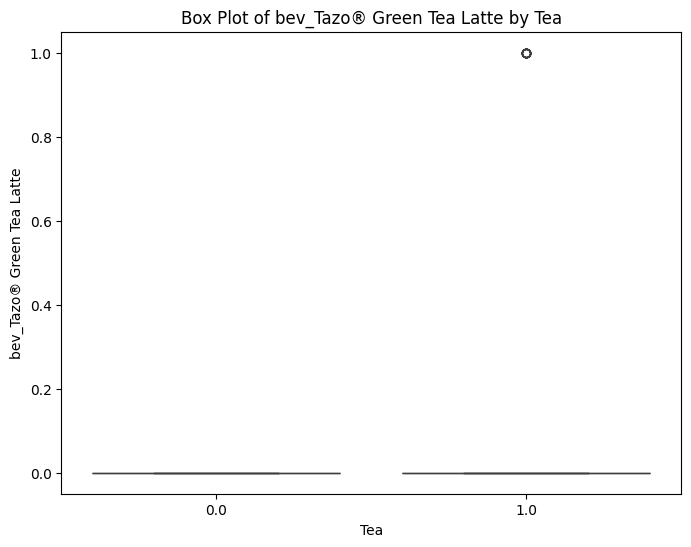

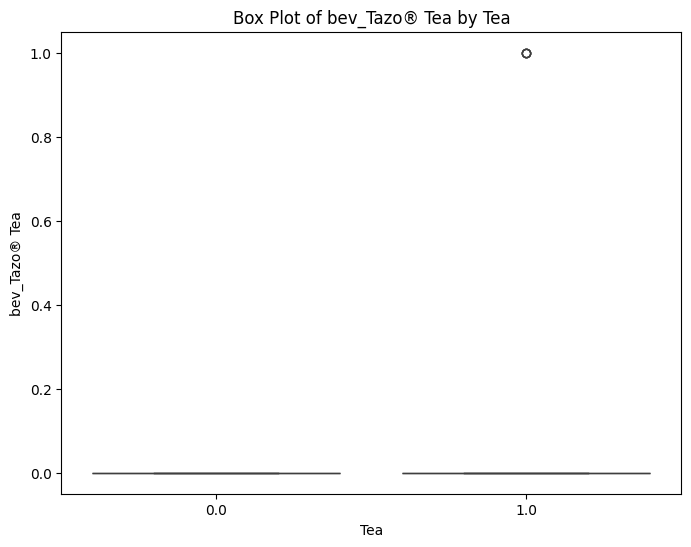

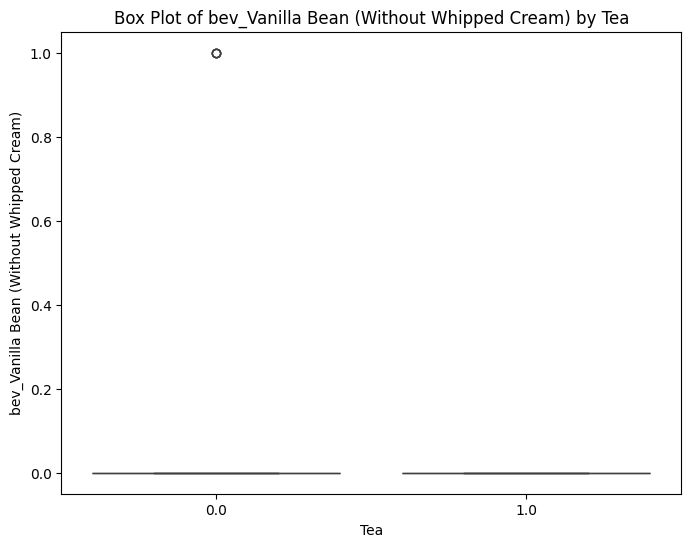

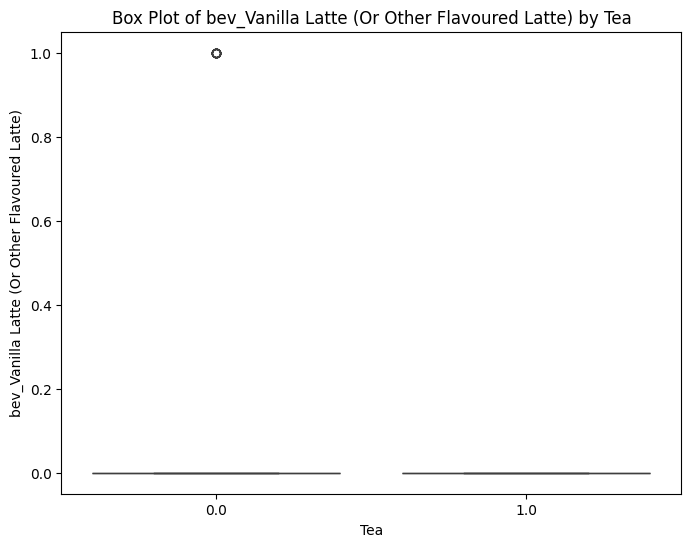

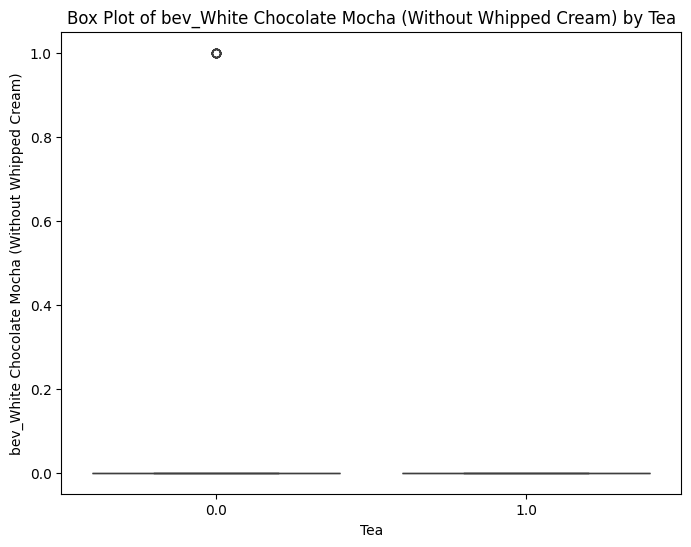

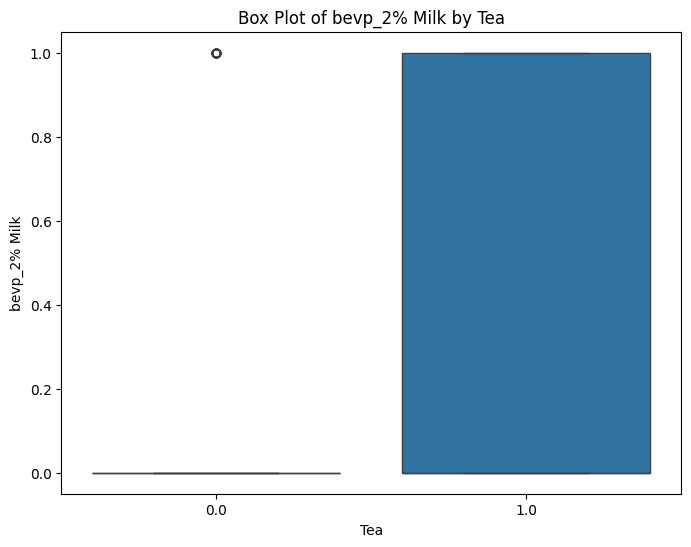

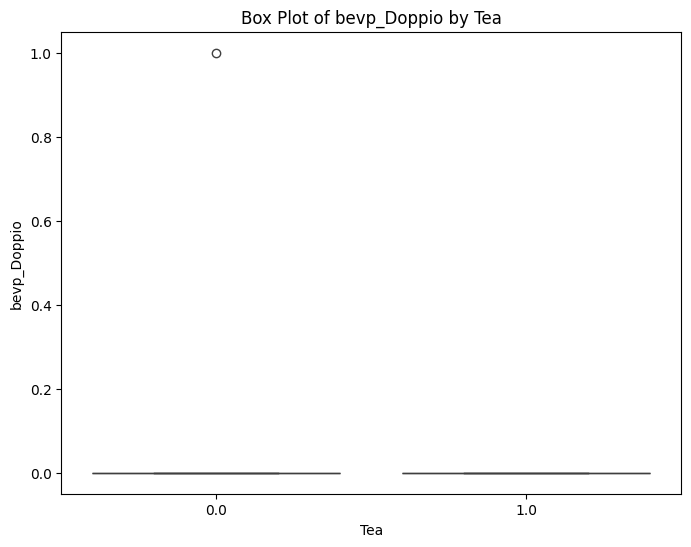

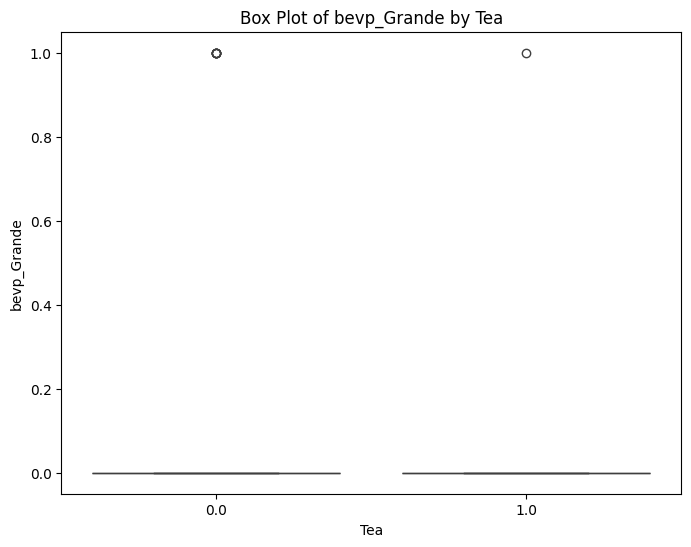

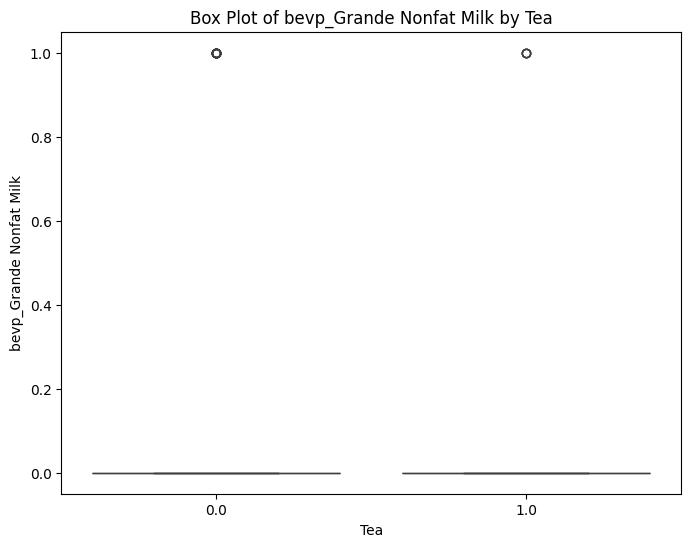

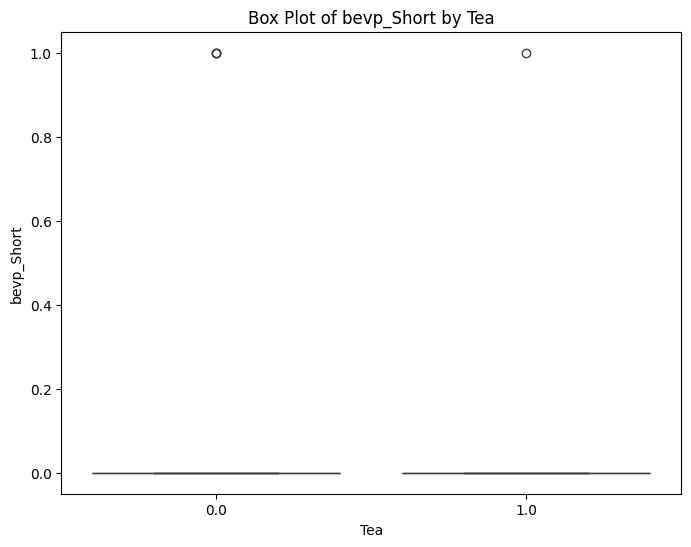

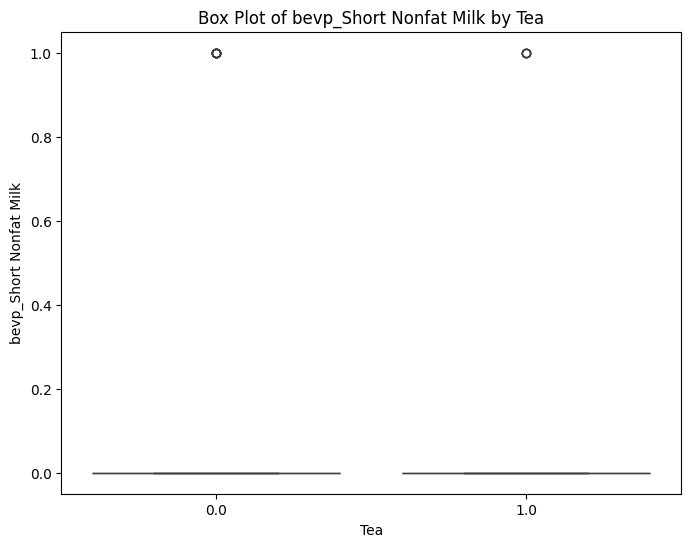

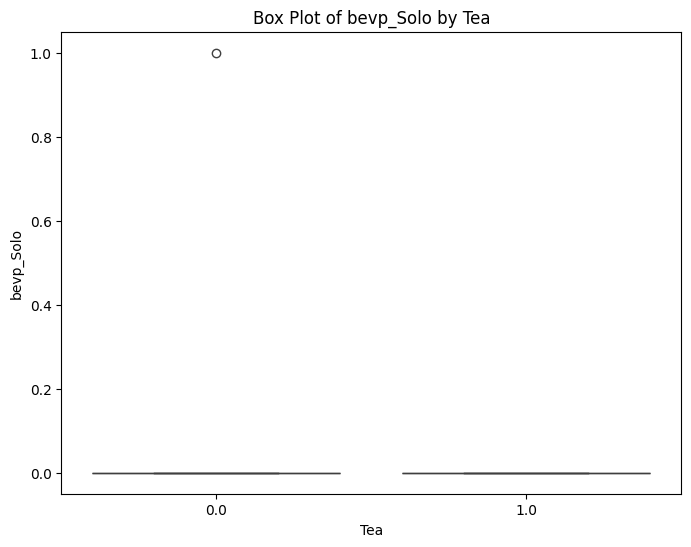

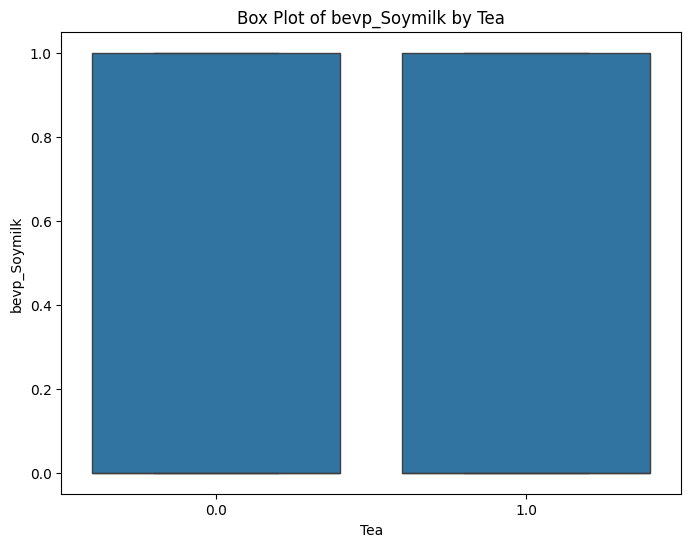

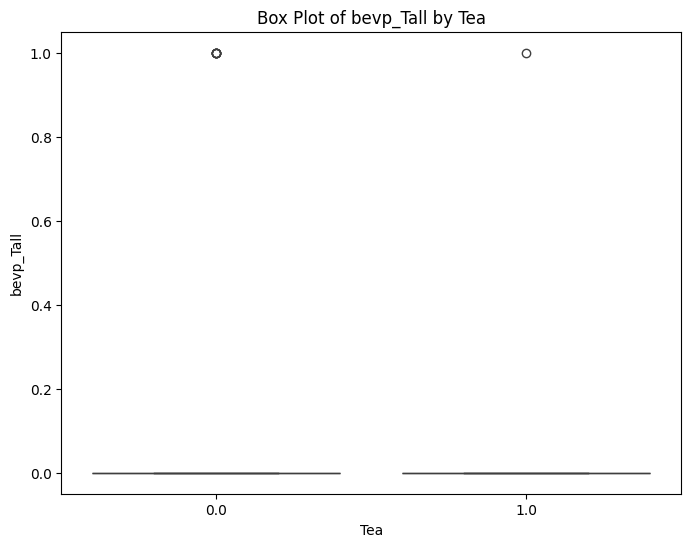

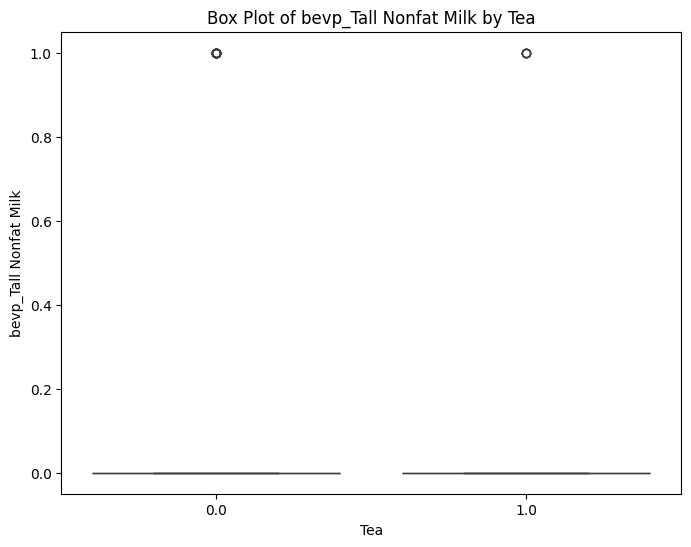

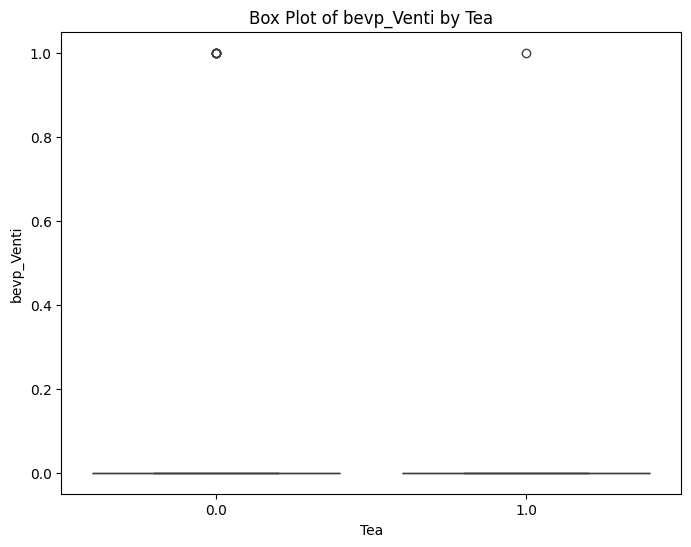

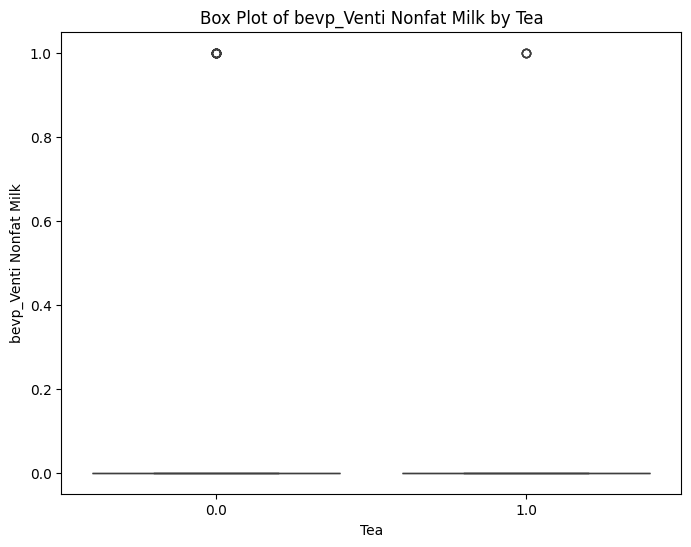

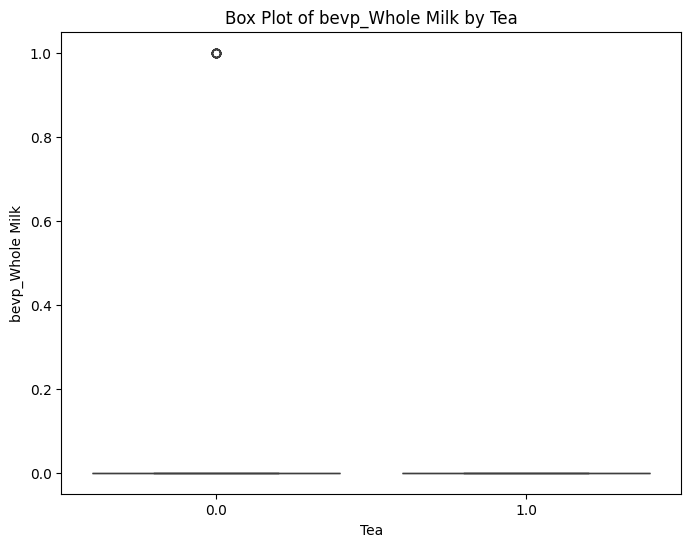

In [48]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Select numeric features
numeric_features = data.select_dtypes(include=['number'])

# Create box plots for each numeric feature, grouped by 'Tea'
for feature in numeric_features.columns:
    if feature != 'Tea':  # Exclude 'Tea' as it's the grouping variable
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Tea', y=feature, data=data)
        plt.title(f'Box Plot of {feature} by Tea')
        plt.show()

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.